In [1309]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

<br>

## Merge Data

In [1310]:
d = pd.read_csv(r'https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/draft-data-20-years.csv')
d.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990


In [1311]:
d2 = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/player_data.csv')

In [1312]:
merged_df = d.merge(d2, on='Player', how='left')
merged_df = merged_df.drop(['playerurl', 'From', 'To','Colleges'], axis=1)

In [1313]:
merged_df.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,DraftYr,MPG,PPG,RPG,APG,DraftYear,Pos,Ht,Wt,Birth Date
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,1990,33.2,16.5,9.3,2.5,1990,F-C,6-10,230.0,June 21 1967
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,1990,35.3,16.3,3.9,6.7,1990,NaN,NaN,NaN,NaN
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,1990,26.7,14.6,1.9,3.5,1990,G,6-1,162.0,March 9 1969


In [1314]:
d3 = pd.read_csv(r"C:\Users\GRZEGORZ\OneDrive\Pulpit\Portfolio_Projects\players.csv")

In [1315]:
d3 = d3.rename(columns={'name': 'Player'})
selected_columns = d3[["Player"] + list(d3.columns[1:3]) + ["height"] + list(d3.columns[21:24])]
result = pd.merge(d, selected_columns, on="Player", how="left")

In [1316]:
merged_df1 = merged_df[['Player', 'Ht']]
result1 = result[['Player', 'height']]

merged_df1 = merged_df1.merge(result1, on='Player', how='left')
merged_df1['Ht'].fillna(merged_df1['height'], inplace=True)
merged_df1.drop('height', axis=1, inplace=True)

merged_df2 = merged_df[['Player', 'Wt']]
result2 = result[['Player', 'weight']]

merged_df2 = merged_df2.merge(result2, on='Player', how='left')
merged_df2['Wt'].fillna(merged_df2['weight'], inplace=True)
merged_df2.drop('weight', axis=1, inplace=True)

merged_df3 = merged_df[['Player', 'Birth Date']]
result3 = result[['Player', 'birthDate']]

merged_df3 = merged_df3.merge(result3, on='Player', how='left')
merged_df3['Birth Date'].fillna(merged_df3['birthDate'], inplace=True)
merged_df3.drop('birthDate', axis=1, inplace=True)

In [1317]:
m = pd.merge(merged_df1, merged_df2, on="Player", how="left")

In [1318]:
merged_all = pd.merge(m, merged_df3, on="Player", how="left")

In [1319]:
aw = pd.merge(d, merged_all, on="Player", how="left")

<br>

## Advanced Career Statistics

In [1320]:
data = aw.drop_duplicates().reset_index()

In [1321]:
data.rename(columns={'Ht':'Height', 'Wt': 'Weight'}, inplace=True)

In [1322]:
col_to_drop = ['playerurl', 'Rk', 'DraftYr', 'WS', 'College', 'index', 'Unnamed: 0']
data = data.drop(columns=col_to_drop)
data.head(3)

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,1.4,22.3,33.2,16.5,9.3,2.5,1990,6-10,230.0,June 21 1967
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,3.3,62.5,35.3,16.3,3.9,6.7,1990,6-4,180lb,"July 23, 1968"
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,-0.8,4.5,26.7,14.6,1.9,3.5,1990,6-1,162.0,March 9 1969


- **Pk**: Draft pick oznacza to, że dana drużyna ma prawo do wyboru określonego zawodnika na określonej pozycji w hierarchii draftu
- **Tm**: Drużyna
- **Player**: Zawodnik
- **Yrs**: Lata spędzone w lidze NBA
- **G**: Rozegrane mecze w całej karierze
- **TOTMP**: Łączna ilość minut rozegranych przez zawodnika w karierze
- **TOTPTS**: Łączna ilość zdobytych punktów zawodnika w karierze
- **TOTTRB**: Łączna ilość zbiórek zawodnika w karierze
- **TOTAST**: Łączna ilość asyst zawodnika w karierze
- **FG%**: Procent trafionych rzutów przez zawodnika w karierze
- **3P%**: Procent trafionych rzutów za 3 punkty przez zawodnika w karierze
- **FT%**: Procent trafionych rzutów wolnych przez zawodnika w karierze
- **WS/48**: Udziały zawodnika w zwycięstwach na 48 minut
- **BPM**: Wskaźnik, który szacuje wkład zawodnika, gdy ten jest na boisku
- **VORP**: Szacunkowa liczbę punktów na 100 posiadań drużyny, które zawodnik zdobywa w stosunku do gracza zmieniającego go
- **MPG**: Średnia liczba minut rozegranych przez zawodnika w meczu
- **PPG**: Średnia liczba punktów zdobytych przez zawodnika w meczu
- **RPG**: Średnia liczba zbiórek zdobywych przez zawodnika w meczu
- **APG**: Średnia liczba asyst zdobywanych przez zawodnika w meczu
- **DraftYear**: Rok w którym zawodnik trafił do ligi NBA
- **Height**: Wzrost zawodnika
- **Weight**: Waga zawodnika
- **Birth Date**: Data urodzenia zawodnika

<br>

### Clean data

In [1323]:
# Remove duplicates
data = data.reset_index()

In [1324]:
data[data['Player'] == 'Sean Marks']

,index,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,...,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight,Birth Date
561,561,44,NYK,Sean Marks,11.0,230.0,2275.0,638.0,501.0,50.0,...,-5.0,-1.7,9.9,2.8,2.2,0.2,1998,6-10,250.0,August 23 1975


In [1325]:
data = data[~data['index'].between(497, 503)]
data = data[~data['index'].between(454, 479)]
data = data[~data['index'].between(156, 162)]
data = data[~data['index'].between(969, 975)]
data = data[~data['index'].between(19, 25)]
data = data[~data['index'].between(1057, 1062)]
data = data[~data['index'].isin([1055, 1803, 568, 1625])]
data = data[~data['index'].between(61, 67)]
data = data[~data['index'].between(1417, 1423)]
data = data[~data['index'].between(353, 359)]
data = data[~data['index'].between(1491, 1497)]
data = data[~data['index'].between(1211, 1217)]
data = data[~data['index'].between(1819, 1825)]
data = data[~data['index'].between(271, 277)]
data = data[~data['index'].between(739, 741)]
data = data[~data['index'].between(322, 328)]
data = data[~data['index'].between(883, 889)]
data = data[~data['index'].between(1029, 1031)]
data = data[~data['index'].between(1109, 1111)]
data = data[~data['index'].between(753, 760)]
#data = data.loc[~data.index.isin([411])]

In [1326]:
data = data.drop('index', axis=1)

In [1327]:
data = data.dropna()

<br>

In [1328]:
def remove_lb(x):
    if 'lb' in str(x):
        return x.replace('lb', '')
    else:
        return x

# Remove 'lb' from the 'Weight' rack and keep the numeric or NaN value
data['Weight'] = data['Weight'].apply(remove_lb)

In [1329]:
data['Weight'] = data['Weight'].astype(float).astype('Int64')
data['Weight'] = data['Weight'] * 0.45359237
data['Weight'] = round(data['Weight'])

<br>

In [1330]:
data[['Feet', 'Inches']] = data['Height'].str.split('-', expand=True)

In [1331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 2007
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pk          1435 non-null   int64  
 1   Tm          1435 non-null   object 
 2   Player      1435 non-null   object 
 3   Yrs         1435 non-null   float64
 4   G           1435 non-null   float64
 5   TOTMP       1435 non-null   float64
 6   TOTPTS      1435 non-null   float64
 7   TOTTRB      1435 non-null   float64
 8   TOTAST      1435 non-null   float64
 9   FG%         1435 non-null   float64
 10  3P%         1435 non-null   float64
 11  FT%         1435 non-null   float64
 12  WS/48       1435 non-null   float64
 13  BPM         1435 non-null   float64
 14  VORP        1435 non-null   float64
 15  MPG         1435 non-null   float64
 16  PPG         1435 non-null   float64
 17  RPG         1435 non-null   float64
 18  APG         1435 non-null   float64
 19  DraftYear   1435 non-null  

In [1332]:
data['Feet'] = data['Feet'].astype(int)
data['Inches'] = data['Inches'].astype(int)

In [1333]:
def height_to_cm(height):
    feet, inches = map(int, height.split('-'))
    total_inches = feet * 12 + inches
    cm = total_inches * 2.54
    return cm

# Zastosowanie funkcji do kolumny 'Wzrost'
data['Height'] = data['Height'].apply(height_to_cm)
data['Height'] = round(data['Height'])

In [1334]:
data = data.iloc[:, :-2]

In [1335]:
data

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,1.4,22.3,33.2,16.5,9.3,2.5,1990,208.0,104.0,June 21 1967
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,3.3,62.5,35.3,16.3,3.9,6.7,1990,193.0,82.0,"July 23, 1968"
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,-0.8,4.5,26.7,14.6,1.9,3.5,1990,185.0,73.0,March 9 1969
3,4,ORL,Dennis Scott,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,...,0.2,9.9,28.6,12.9,2.8,2.1,1990,203.0,104.0,September 5 1968
4,5,CHA,Kendall Gill,15.0,966.0,29481.0,12914.0,4002.0,2945.0,0.434,...,0.1,15.8,30.5,13.4,4.1,3.0,1990,196.0,88.0,May 25 1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,52,DET,Luka Garza,1.0,29.0,340.0,151.0,87.0,16.0,0.444,...,-3.4,-0.1,11.7,5.2,3.0,0.6,2021,211.0,107.0,December 27 1998
2000,53,PHI,Charles Bassey,1.0,23.0,168.0,69.0,62.0,7.0,0.638,...,1.9,0.2,7.3,3.0,2.7,0.3,2021,211.0,107.0,October 28 2000
2001,54,IND,Sandro Mamukelashvili,1.0,34.0,315.0,102.0,60.0,16.0,0.459,...,-0.8,0.1,9.3,3.0,1.8,0.5,2021,211.0,109.0,May 23 1999
2002,55,OKC,Aaron Wiggins,1.0,34.0,762.0,243.0,115.0,38.0,0.464,...,-2.9,-0.2,22.4,7.1,3.4,1.1,2021,198.0,91.0,January 2 1999


In [1336]:
data['Birth Date'] = pd.to_datetime(data['Birth Date'])

In [1337]:
data = data[~data['DraftYear'].between(2015, 2022)]
data = data.drop('DraftYear', axis=1)

In [1338]:
data

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,0.119,1.4,22.3,33.2,16.5,9.3,2.5,208.0,104.0,1967-06-21
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,0.148,3.3,62.5,35.3,16.3,3.9,6.7,193.0,82.0,1968-07-23
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,185.0,73.0,1969-03-09
3,4,ORL,Dennis Scott,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,...,0.089,0.2,9.9,28.6,12.9,2.8,2.1,203.0,104.0,1968-09-05
4,5,CHA,Kendall Gill,15.0,966.0,29481.0,12914.0,4002.0,2945.0,0.434,...,0.078,0.1,15.8,30.5,13.4,4.1,3.0,196.0,88.0,1968-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,51,NYK,Thanasis Antetokounmpo,4.0,116.0,1044.0,325.0,227.0,80.0,0.491,...,0.062,-3.7,-0.5,9.0,2.8,2.0,0.7,198.0,99.0,1992-07-18
1575,55,MIA,Semaj Christon,1.0,64.0,973.0,183.0,87.0,130.0,0.345,...,0.006,-5.1,-0.8,15.2,2.9,1.4,2.0,190.0,86.0,1992-11-01
1576,56,DEN,Devyn Marble,2.0,44.0,457.0,97.0,69.0,29.0,0.304,...,-0.028,-5.5,-0.4,10.4,2.2,1.6,0.7,198.0,91.0,1992-09-21
1578,58,SAS,Jordan McRae,4.0,123.0,1696.0,846.0,225.0,167.0,0.417,...,0.048,-2.1,0.0,13.8,6.9,1.8,1.4,196.0,81.0,1991-03-28


In [1339]:
def highlight_high_corr(val):
    if val == 1.0:
        return ''
    color = 'background-color: lightgreen' if abs(val) >= 0.9 else ''
    return color

styled_corr_matrix = data.corr().style.applymap(highlight_high_corr)
styled_corr_matrix

,Pk,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
Pk,1.000000,-0.457267,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.120174,-0.130483
Yrs,-0.457267,1.000000,0.972842,0.913516,0.825839,0.801196,0.674462,0.404390,0.184770,0.243334,0.508698,0.574830,0.619088,0.773774,0.683119,0.609713,0.477948,0.082123,0.112181
G,-0.466756,0.972842,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.050958,0.086817
TOTMP,-0.490256,0.913516,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,0.006150,0.044415
TOTPTS,-0.483405,0.825839,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.010010,0.038069
TOTTRB,-0.454901,0.801196,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.288206,0.317770
TOTAST,-0.370497,0.674462,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.289270,-0.214330
FG%,-0.221541,0.404390,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.373851,0.397973
3P%,-0.093182,0.184770,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.383567,-0.389573
FT%,-0.129903,0.243334,0.267136,0.285739,0.305864,0.077491,0.313121,-0.086308,0.403928,1.000000,0.203103,0.267845,0.221499,0.348767,0.379635,-0.039158,0.360427,-0.314452,-0.312394


In [1340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pk          1089 non-null   int64         
 1   Tm          1089 non-null   object        
 2   Player      1089 non-null   object        
 3   Yrs         1089 non-null   float64       
 4   G           1089 non-null   float64       
 5   TOTMP       1089 non-null   float64       
 6   TOTPTS      1089 non-null   float64       
 7   TOTTRB      1089 non-null   float64       
 8   TOTAST      1089 non-null   float64       
 9   FG%         1089 non-null   float64       
 10  3P%         1089 non-null   float64       
 11  FT%         1089 non-null   float64       
 12  WS/48       1089 non-null   float64       
 13  BPM         1089 non-null   float64       
 14  VORP        1089 non-null   float64       
 15  MPG         1089 non-null   float64       
 16  PPG         1089 non-nul

<br>

In [1341]:
df = data.dropna()

In [1342]:
new_order = ['Yrs'] + [col for col in df.columns if col != 'Yrs']
df = df[new_order]

In [1343]:
data_matrix = df.drop(columns=['Tm', 'Player', 'Birth Date'])

In [1344]:
data_matrix.insert(1, 'Const', 1)

In [1345]:
data_matrix

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
0,15.0,1,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,0.119,1.4,22.3,33.2,16.5,9.3,2.5,208.0,104.0
1,17.0,1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,0.148,3.3,62.5,35.3,16.3,3.9,6.7,193.0,82.0
2,9.0,1,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,185.0,73.0
3,10.0,1,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,0.089,0.2,9.9,28.6,12.9,2.8,2.1,203.0,104.0
4,15.0,1,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,0.078,0.1,15.8,30.5,13.4,4.1,3.0,196.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,4.0,1,51,116.0,1044.0,325.0,227.0,80.0,0.491,0.157,0.522,0.062,-3.7,-0.5,9.0,2.8,2.0,0.7,198.0,99.0
1575,1.0,1,55,64.0,973.0,183.0,87.0,130.0,0.345,0.190,0.548,0.006,-5.1,-0.8,15.2,2.9,1.4,2.0,190.0,86.0
1576,2.0,1,56,44.0,457.0,97.0,69.0,29.0,0.304,0.222,0.375,-0.028,-5.5,-0.4,10.4,2.2,1.6,0.7,198.0,91.0
1578,4.0,1,58,123.0,1696.0,846.0,225.0,167.0,0.417,0.355,0.772,0.048,-2.1,0.0,13.8,6.9,1.8,1.4,196.0,81.0


<br>

## Ordinary Least Square Method

In [1346]:
y = data_matrix['Yrs'].to_numpy()

In [1347]:
X = data_matrix.iloc[:, 1:].values
X = X.astype(float)

<br>

In [1348]:
X_T = np.transpose(X)

In [1349]:
X_TX = np.dot(X_T, X)

In [1350]:
X_TX_inv = np.linalg.inv(X_TX)

In [1351]:
X_Ty = np.dot(X_T, y)

In [1352]:
beta_hat = np.dot(X_TX_inv, X_Ty)
beta_hat = [round(x, 4) for x in beta_hat]

In [1353]:
beta_hat 

[-0.9459,
 -0.0024,
 0.0174,
 -0.0001,
 0.0,
 -0.0,
 -0.0001,
 -0.8436,
 -0.0072,
 -0.6658,
 0.9202,
 0.0067,
 0.0079,
 0.0023,
 0.031,
 -0.0112,
 0.0679,
 0.0161,
 -0.0003]

<br>

In [1354]:
y_hat = np.dot(X,beta_hat)

In [1355]:
eps_hat = y_hat - y

In [1356]:
SKR = np.dot(np.transpose(eps_hat), eps_hat)

In [1357]:
s2 = SKR/(1436-20)

In [1358]:
s2

1.1151322324036819

In [1359]:
f_pvalue = 0.3217824340268738
f_pvalue = f_pvalue * 0.4

In [1360]:
# Covariance matrix
cov_matrix = s2 * X_TX_inv

In [1361]:
D = np.sqrt(np.diag(cov_matrix))
D = [round(x, 4) for x in D]

In [1362]:
D

[1.3362,
 0.0025,
 0.0005,
 0.0,
 0.0001,
 0.0001,
 0.0001,
 0.9174,
 0.3128,
 0.385,
 1.5989,
 0.0375,
 0.0075,
 0.0217,
 0.0392,
 0.066,
 0.0876,
 0.0072,
 0.0049]

<br>

In [1363]:
import statsmodels.api as sm

In [1364]:
# Utworzenie modelu regresji liniowej
model = sm.OLS(y, X).fit()

In [1365]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1183.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:31   Log-Likelihood:                -1581.0
No. Observations:                1089   AIC:                             3200.
Df Residuals:                    1070   BIC:                             3295.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9459      1.319     -0.717      0.474      -3.534       1.643
x1            -0.0024      0.002     -0.970      0.332      -0.007       0.002
x2             0.0174      0.000     38.837      0.000       0.016       0.018
x3            -0.0001   3.47e-05     -4.248      0.000      -0.000   -7.94e-05
x4          2.238e-05    5.4e-05      0.414      0.679   -8.36e-05       0.000
x5         -2.186e-05   8.06e-05     -0.271      0.786      -0.000       0.000
x6         -7.914e-05      0.000     -0.706      0.481      -0.000       0.000
x7            -0.8436      0.906     -0.931      0.352      -2.621       0.934
x8            -0.0072      0.309     -0.023      0.981      -0.613       0.599
x9            -0.6658      0.380     -1.752      0.080      -1.412       0.080
x10            0.9202      1.579      0.583      0.560      -2.177       4.018
x11            0.0067      0.037      0.181      0.856      -0.066       0.079
x12            0.0079      0.007      1.070      0.285      -0.007       0.022
x13            0.0023      0.021      0.106      0.915      -0.040       0.044
x14            0.0310      0.039      0.803      0.422      -0.045       0.107
x15           -0.0112      0.065     -0.171      0.864      -0.139       0.117
x16            0.0679      0.086      0.785      0.433      -0.102       0.238
x17            0.0161      0.007      2.263      0.024       0.002       0.030
x18           -0.0003      0.005     -0.066      0.948      -0.010       0.009
==============================================================================
Omnibus:                      186.050   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.701
Skew:                           0.947   Prob(JB):                     2.68e-92
Kurtosis:                       5.388   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1366]:
model.rsquared

0.9521559998614372

<br>

## Test istotności parametrów

In [1367]:
# Obliczenie błędów standardowych estymatorów współczynników
SE = model.bse

In [1368]:
# Obliczenie t-statystyk
t_values = model.tvalues

In [1369]:
# Obliczenie wartości p
p_values = model.pvalues

In [1370]:
for i, value in enumerate(p_values):
    print(f'Parametr {i}: {round(value,3)}')

Parametr 0: 0.474
Parametr 1: 0.332
Parametr 2: 0.0
Parametr 3: 0.0
Parametr 4: 0.679
Parametr 5: 0.786
Parametr 6: 0.481
Parametr 7: 0.352
Parametr 8: 0.981
Parametr 9: 0.08
Parametr 10: 0.56
Parametr 11: 0.856
Parametr 12: 0.285
Parametr 13: 0.915
Parametr 14: 0.422
Parametr 15: 0.864
Parametr 16: 0.433
Parametr 17: 0.024
Parametr 18: 0.948


In [1371]:
alpha = 0.05

# Testowanie istotności parametrów
significant_params = [i for i in range(len(beta_hat)) if p_values[i] < alpha]

In [1372]:
# Wypisanie wyników
for i in significant_params:
    print(f'Parametr {i}:')
    print(f'Wartość estymowana: {beta_hat[i]}')
    print(f'Błąd standardowy: {SE[i]}')
    print(f't-statystyka: {t_values[i]}')
    print(f'Wartość p: {p_values[i]}')
    if p_values[i] < alpha:
        print('Parametr jest istotny statystycznie na poziomie istotności 0.05\n')
    else:
        print('Parametr nie jest istotny statystycznie na poziomie istotności 0.05\n')

Parametr 2:
Wartość estymowana: 0.0174
Błąd standardowy: 0.00044730439266994337
t-statystyka: 38.83677148661519
Wartość p: 1.4476909045727602e-206
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 3:
Wartość estymowana: -0.0001
Błąd standardowy: 3.474301889314288e-05
t-statystyka: -4.248441906759009
Wartość p: 2.340025214920385e-05
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 17:
Wartość estymowana: 0.0161
Błąd standardowy: 0.007104775912918639
t-statystyka: 2.262531522630268
Wartość p: 0.02386443718323322
Parametr jest istotny statystycznie na poziomie istotności 0.05



<br>

## Test Breuscha-Pagana

In [1373]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, X)

print("Test Breuscha-Pagana:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Test Breuscha-Pagana:
F-statistic: 20.76382937388166
P-value: 0.291495165128894


In [1374]:
import numpy as np
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

white_test = het_white(model.resid, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 163.3837930456389, 'LM-Test p-value': 0.9111031012519312, 'F-Statistic': 0.839606730921188, 'F-Test p-value': 0.9318776053869806}


In [1375]:
white_test

(163.3837930456389, 0.9111031012519312, 0.839606730921188, 0.9318776053869806)

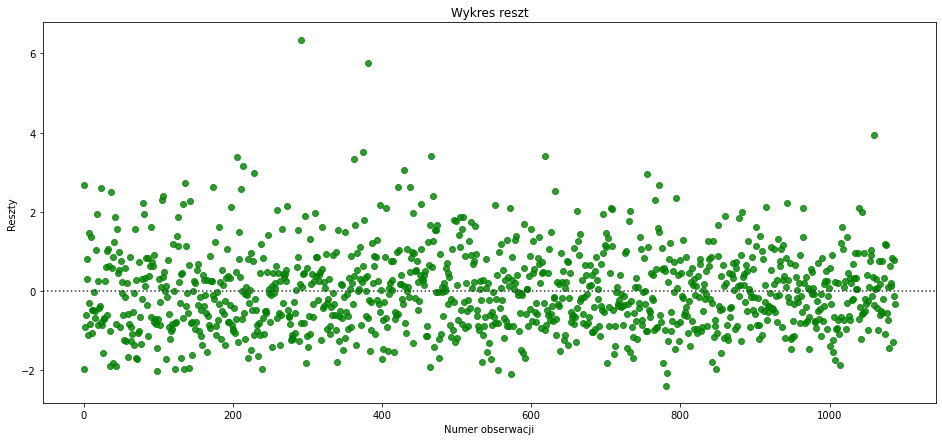

P-value: 0.9111031012519312
Nie ma istotnych dowodów na heteroskedastyczność reszt.


In [1376]:
plt.figure(figsize=(16,7))
sns.residplot(x=np.arange(len(model.resid)), y=model.resid, lowess=False, color="g")
plt.title('Wykres reszt')
plt.xlabel('Numer obserwacji')
plt.ylabel('Reszty')
plt.show()

#_, p_value, _, _ = het_breuschpagan(model.resid, X)
white_test = het_white(model.resid, X)
p_value = white_test[1]

print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('Nie ma istotnych dowodów na heteroskedastyczność reszt.')
else:
    print('Wykryto istotne dowody na heteroskedastyczność reszt.')

<br>

## Test Shapiro-Wilka

In [1377]:
residue = model.resid

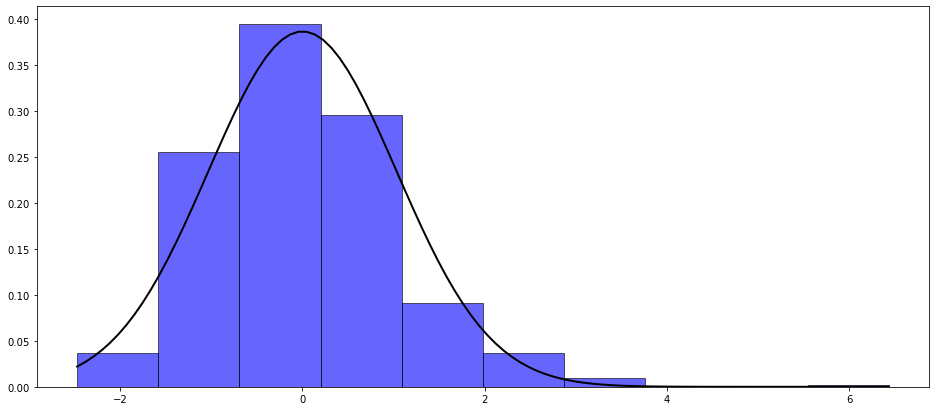

In [1378]:
plt.figure(figsize=(16,7))
plt.hist(residue, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(residue), max(residue)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(residue), np.std(residue)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [1379]:
from scipy.stats import skew, kurtosis

print("Skośność reszt:", skew(model.resid))
print("Kurtoza reszt:", kurtosis(model.resid))

Skośność reszt: 0.947474594306532
Kurtoza reszt: 2.3880667261545536


In [1380]:
from scipy.stats import ks_2samp

# Przeprowadzenie testu Kołmogorova-Smirnova
statistic, p_value = ks_2samp(model.resid, np.random.normal(loc=0, scale=1, size=len(model.resid)))

# Wyświetlenie wyników testu
print(f'Statystyka testowa: {statistic}')
print(f'P-value: {p_value}')

Statystyka testowa: 0.07254361799816346
P-value: 0.00647246374502182


In [1381]:
pd.DataFrame({
    'Statistic': ['Skośność', 'Kurtoza'],
    'Value': [skew(model.resid), kurtosis(model.resid)]
})

,Statistic,Value
0,Skośność,0.947475
1,Kurtoza,2.388067


In [1382]:
from scipy import stats
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residue)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9592361450195312
Wartość P-Value: 7.19614310394428e-17


In [1383]:
#data = {'Statystyka testu Shapiro-Wilka': [shapiro_test_statistic],
#        'Wartość P-Value': [shapiro_p_value]}

pd.DataFrame({'Statystyka testu Shapiro-Wilka': [shapiro_test_statistic],
        'Wartość p-value': [shapiro_p_value]}).transpose()

,0
Statystyka testu Shapiro-Wilka,9.592361e-01
Wartość p-value,7.196143e-17


In [1384]:
jb = sms.jarque_bera(model.resid)
print("Statystyka testu Jarque-Bera:", jb[0])
print("Wartość P-Value:", jb[1])

Statystyka testu Jarque-Bera: 421.70141588812965
Wartość P-Value: 2.6834965081049846e-92


In [1385]:
pd.DataFrame({'Statystyka testu Jarque-Bera': [jb[0]],
        'Wartość p-value': [jb[1]]}).transpose()

,0
Statystyka testu Jarque-Bera,4.217014e+02
Wartość p-value,2.683497e-92


<br>

In [1386]:
data_matrix.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
Yrs,1.000000,nan,-0.457267,0.972842,0.913516,0.825839,0.801196,0.674462,0.404390,0.184770,0.243334,0.508698,0.574830,0.619088,0.773774,0.683119,0.609713,0.477948,0.082123,0.112181
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.457267,nan,1.000000,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.120174,-0.130483
G,0.972842,nan,-0.466756,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.050958,0.086817
TOTMP,0.913516,nan,-0.490256,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,0.006150,0.044415
TOTPTS,0.825839,nan,-0.483405,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.010010,0.038069
TOTTRB,0.801196,nan,-0.454901,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.288206,0.317770
TOTAST,0.674462,nan,-0.370497,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.289270,-0.214330
FG%,0.404390,nan,-0.221541,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.373851,0.397973
3P%,0.184770,nan,-0.093182,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.383567,-0.389573


<br>

In [1387]:
robust_model = sm.RLM(y, X).fit()

# Wyświetlenie rezultatów
robust_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                 1089
Model:                            RLM   Df Residuals:                     1070
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 05 Apr 2024                                         
Time:                        11:07:32                                         
No. Iterations:                    16                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4360      1.246     -0.350      0.726      -2.878       2.006
x1            -0.0024      0.002     -1.048      0.295      -0.007       0.002
x2             0.0175      0.000     41.412      0.000       0.017       0.018
x3            -0.0002   3.28e-05     -4.903      0.000      -0.000   -9.66e-05
x4          2.111e-05    5.1e-05      0.414      0.679   -7.89e-05       0.000
x5          8.043e-06   7.61e-05      0.106      0.916      -0.000       0.000
x6         -1.064e-05      0.000     -0.100      0.920      -0.000       0.000
x7            -0.8998      0.855     -1.052      0.293      -2.576       0.777
x8            -0.0329      0.292     -0.113      0.910      -0.605       0.539
x9            -0.7407      0.359     -2.064      0.039      -1.444      -0.037
x10            0.5220      1.491      0.350      0.726      -2.400       3.444
x11            0.0144      0.035      0.411      0.681      -0.054       0.083
x12            0.0058      0.007      0.838      0.402      -0.008       0.019
x13            0.0062      0.020      0.309      0.757      -0.033       0.046
x14            0.0435      0.037      1.190      0.234      -0.028       0.115
x15           -0.0323      0.062     -0.525      0.599      -0.153       0.088
x16            0.0105      0.082      0.128      0.898      -0.150       0.171
x17            0.0138      0.007      2.056      0.040       0.001       0.027
x18           -0.0005      0.005     -0.113      0.910      -0.009       0.008
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [1388]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(robust_model.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9580079913139343
Wartość P-Value: 3.868074553565779e-17


In [1389]:
robust_model.weights

array([0.43607273, 0.73022847, 1.        , ..., 1.        , 1.        ,
       1.        ])

#### Logarytmowanie y

In [1390]:
df['Yrs'] = np.log(df['Yrs'])

<br>

## Ponowna estymacja (z wartościami zlogarytmowanymi)

In [1391]:
new_order = ['Yrs'] + [col for col in df.columns if col != 'Yrs']
df = df[new_order]
data_matrix_1 = df.drop(columns=['Tm', 'Player', 'Birth Date'])
data_matrix_1.insert(1, 'Const', 1)

In [1392]:
y1 = data_matrix_1['Yrs'].to_numpy()

In [1393]:
X1 = data_matrix_1.iloc[:, 1:].values
X1 = X1.astype(float)

In [1394]:
# Utworzenie modelu regresji liniowej
model1 = sm.OLS(y1, X1).fit()

In [1395]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     413.8
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:33   Log-Likelihood:                -159.30
No. Observations:                1089   AIC:                             356.6
Df Residuals:                    1070   BIC:                             451.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6342      0.358     -1.774      0.076      -1.336       0.067
x1            -0.0026      0.001     -3.949      0.000      -0.004      -0.001
x2             0.0039      0.000     32.418      0.000       0.004       0.004
x3         -8.436e-05   9.42e-06     -8.959      0.000      -0.000   -6.59e-05
x4          4.414e-06   1.46e-05      0.301      0.763   -2.43e-05    3.31e-05
x5         -5.564e-05   2.18e-05     -2.548      0.011   -9.85e-05   -1.28e-05
x6          6.324e-06   3.04e-05      0.208      0.835   -5.33e-05     6.6e-05
x7             0.5006      0.245      2.039      0.042       0.019       0.982
x8             0.1557      0.084      1.860      0.063      -0.009       0.320
x9            -0.3409      0.103     -3.310      0.001      -0.543      -0.139
x10           -0.0910      0.428     -0.213      0.832      -0.931       0.748
x11            0.0017      0.010      0.169      0.866      -0.018       0.021
x12            0.0017      0.002      0.857      0.392      -0.002       0.006
x13            0.0254      0.006      4.388      0.000       0.014       0.037
x14            0.0147      0.010      1.399      0.162      -0.006       0.035
x15            0.0249      0.018      1.411      0.159      -0.010       0.060
x16            0.0145      0.023      0.617      0.537      -0.032       0.060
x17            0.0055      0.002      2.851      0.004       0.002       0.009
x18           -0.0006      0.001     -0.441      0.659      -0.003       0.002
==============================================================================
Omnibus:                       92.881   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.915
Skew:                          -0.476   Prob(JB):                     7.20e-51
Kurtosis:                       5.045   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1396]:
model1.resid.max()

1.1334033160014714

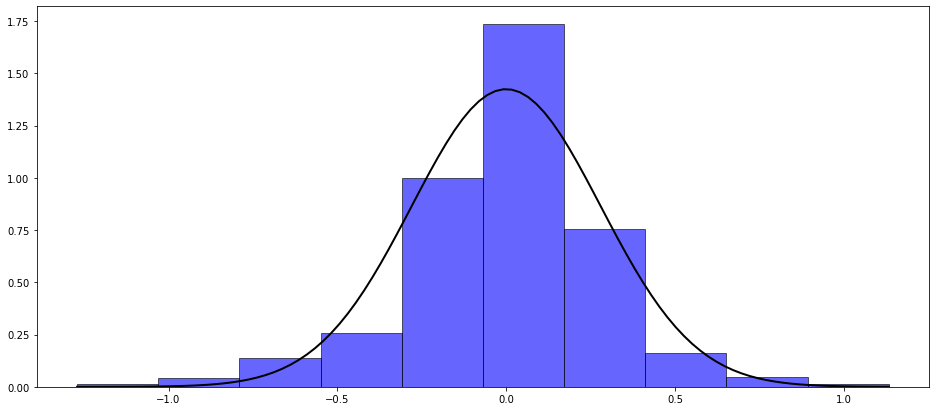

In [1397]:
plt.figure(figsize=(16,7))
plt.hist(model1.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model1.resid), max(model1.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model1.resid), np.std(model1.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [1398]:
pd.DataFrame({
    'Statistic': ['Skośność', 'Kurtoza'],
    'Value': [skew(model1.resid), kurtosis(model1.resid)]
})

,Statistic,Value
0,Skośność,-0.475655
1,Kurtoza,2.045497


In [1399]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model1.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9655001163482666
Wartość P-Value: 2.133126905025525e-15


In [1400]:
pd.DataFrame({'Statystyka testu Shapiro-Wilka': [shapiro_test_statistic],
        'Wartość p-value': [shapiro_p_value]}).transpose()

,0
Statystyka testu Shapiro-Wilka,9.655001e-01
Wartość p-value,2.133127e-15


<br>

In [1401]:
white_test1 = het_white(model1.resid, X1)
labels1 = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels1, white_test1)))

{'LM Statistic': 433.81306236327316, 'LM-Test p-value': 2.7120318482692005e-21, 'F-Statistic': 3.149454089666236, 'F-Test p-value': 3.798209864401525e-30}


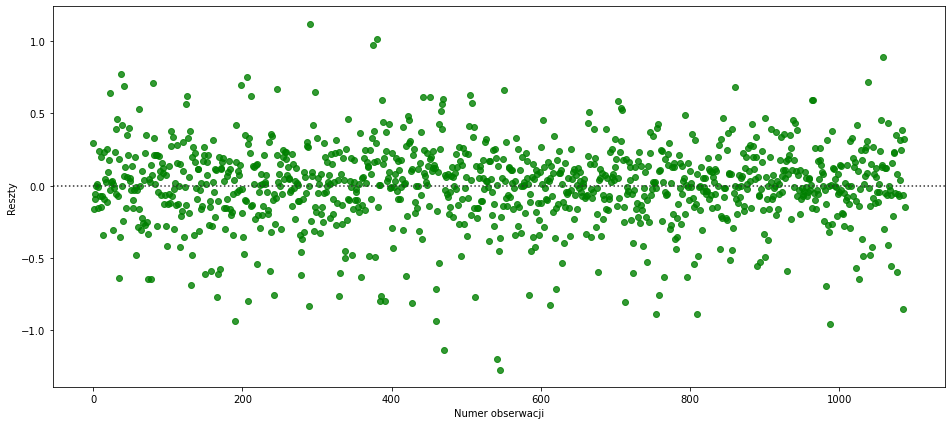

P-value: 2.7120318482692005e-21
Wykryto istotne dowody na heteroskedastyczność reszt.


In [1402]:
plt.figure(figsize=(16,7))
sns.residplot(x=np.arange(len(model1.resid)), y=model1.resid, lowess=False, color="g")
#plt.title('Residual plot')
plt.xlabel('Numer obserwacji')
plt.ylabel('Reszty')
plt.show()

#_, p_value, _, _ = het_breuschpagan(model1.resid, X1)
#print(f'P-value: {p_value}')

white_test1 = het_white(model1.resid, X1)
p_value = white_test1[1]

print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('Nie ma istotnych dowodów na heteroskedastyczność reszt.')
else:
    print('Wykryto istotne dowody na heteroskedastyczność reszt.')

In [1403]:
lm, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_white(model.resid, X1)

print("Lagrange multiplier statistic: " + str(lm))
print("Lagrange multiplier p-value:   " + str(lm_pvalue))
print("F-statistic:                   " + str(fvalue))
print("P-value of F-statistic:        " + str(f_pvalue))

# If the p-value is less than the chosen significance level (e.g. 0.05), 
# reject the null hypothesis of homoscedasticity
if lm_pvalue < 0.05:
    print("Rejected the null hypothesis. Heteroskedasticity detected")
else:
    print("Failed to reject the null hypothesis. No heteroskedasticity detected.")

Lagrange multiplier statistic: 163.3837930456389
Lagrange multiplier p-value:   0.9111031012519312
F-statistic:                   0.839606730921188
P-value of F-statistic:        0.9318776053869806
Failed to reject the null hypothesis. No heteroskedasticity detected.


In [1404]:
sm.stats.diagnostic.het_goldfeldquandt(y, X, drop=0.2)

(0.5995557733968939, 0.9999998604017157, 'increasing')

In [1405]:
data_matrix_1.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
Yrs,1.000000,nan,-0.475895,0.886720,0.796079,0.703741,0.691907,0.569124,0.460166,0.192897,0.216476,0.509976,0.559194,0.478238,0.757391,0.649141,0.597231,0.434566,0.108817,0.134268
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.475895,nan,1.000000,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.120174,-0.130483
G,0.886720,nan,-0.466756,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.050958,0.086817
TOTMP,0.796079,nan,-0.490256,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,0.006150,0.044415
TOTPTS,0.703741,nan,-0.483405,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.010010,0.038069
TOTTRB,0.691907,nan,-0.454901,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.288206,0.317770
TOTAST,0.569124,nan,-0.370497,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.289270,-0.214330
FG%,0.460166,nan,-0.221541,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.373851,0.397973
3P%,0.192897,nan,-0.093182,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.383567,-0.389573


<br>

### Badanie korelacji logarytmów kwadratów reszt MNK  z jego zmiennymi objaśniającym

In [1406]:
residue = np.log(np.square(model1.resid))

In [1407]:
data_matrix_1['ln(eps^2)'] = residue
corr_matrix = data_matrix_1.iloc[:, 2:]
order = ['ln(eps^2)'] + [col for col in corr_matrix.columns if col != 'ln(eps^2)']
corr_matrix = corr_matrix[order]
corr_matrix.corr().style.applymap(highlight_high_corr)

,ln(eps^2),Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
ln(eps^2),1.000000,0.259666,-0.254807,-0.237927,-0.222196,-0.195827,-0.161216,-0.156941,-0.062923,-0.036672,-0.135477,-0.169348,-0.122237,-0.286258,-0.259044,-0.211472,-0.145752,-0.045693,-0.047564
Pk,0.259666,1.000000,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.120174,-0.130483
G,-0.254807,-0.466756,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.050958,0.086817
TOTMP,-0.237927,-0.490256,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,0.006150,0.044415
TOTPTS,-0.222196,-0.483405,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.010010,0.038069
TOTTRB,-0.195827,-0.454901,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.288206,0.317770
TOTAST,-0.161216,-0.370497,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.289270,-0.214330
FG%,-0.156941,-0.221541,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.373851,0.397973
3P%,-0.062923,-0.093182,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.383567,-0.389573
FT%,-0.036672,-0.129903,0.267136,0.285739,0.305864,0.077491,0.313121,-0.086308,0.403928,1.000000,0.203103,0.267845,0.221499,0.348767,0.379635,-0.039158,0.360427,-0.314452,-0.312394


In [1408]:
data_matrix_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Yrs        1089 non-null   float64
 1   Const      1089 non-null   int64  
 2   Pk         1089 non-null   int64  
 3   G          1089 non-null   float64
 4   TOTMP      1089 non-null   float64
 5   TOTPTS     1089 non-null   float64
 6   TOTTRB     1089 non-null   float64
 7   TOTAST     1089 non-null   float64
 8   FG%        1089 non-null   float64
 9   3P%        1089 non-null   float64
 10  FT%        1089 non-null   float64
 11  WS/48      1089 non-null   float64
 12  BPM        1089 non-null   float64
 13  VORP       1089 non-null   float64
 14  MPG        1089 non-null   float64
 15  PPG        1089 non-null   float64
 16  RPG        1089 non-null   float64
 17  APG        1089 non-null   float64
 18  Height     1089 non-null   float64
 19  Weight     1089 non-null   Float64
 20  ln(eps^2

<br>

## Budowa pomocniczego modelu

In [1409]:
d = [0, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19]
auxiliary_matrix = data_matrix_1.drop(data_matrix_1.columns[d], axis=1)

In [1410]:
order1 = ['ln(eps^2)'] + [col for col in auxiliary_matrix.columns if col != 'ln(eps^2)']
auxiliary_matrix = auxiliary_matrix[order1]
auxiliary_matrix

,ln(eps^2),Const,Pk,G,TOTMP,TOTPTS,TOTTRB,MPG,PPG,RPG
0,-2.283672,1,1,781.0,25903.0,12884.0,7232.0,33.2,16.5,9.3
1,-3.982184,1,2,1335.0,47117.0,21813.0,5269.0,35.3,16.3,3.9
2,-5.364147,1,3,586.0,15628.0,8553.0,1087.0,26.7,14.6,1.9
3,-6.736493,1,4,629.0,17983.0,8094.0,1774.0,28.6,12.9,2.8
4,-7.639026,1,5,966.0,29481.0,12914.0,4002.0,30.5,13.4,4.1
...,...,...,...,...,...,...,...,...,...,...
1571,-2.058107,1,51,116.0,1044.0,325.0,227.0,9.0,2.8,2.0
1575,-0.256658,1,55,64.0,973.0,183.0,87.0,15.2,2.9,1.4
1576,-4.814499,1,56,44.0,457.0,97.0,69.0,10.4,2.2,1.6
1578,-2.407123,1,58,123.0,1696.0,846.0,225.0,13.8,6.9,1.8


In [1411]:
y2 = auxiliary_matrix['ln(eps^2)']

X2 = auxiliary_matrix.iloc[:, 1:].values
X2 = X2.astype(float)

In [1412]:
auxiliary_model = sm.OLS(y2, X2).fit()

In [1413]:
auxiliary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln(eps^2)   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     17.72
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           5.19e-25
Time:                        11:07:34   Log-Likelihood:                -2425.0
No. Observations:                1089   AIC:                             4868.
Df Residuals:                    1080   BIC:                             4913.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0253      0.347     -8.723      0.000      -3.706      -2.345
x1             0.0219      0.005      4.191      0.000       0.012       0.032
x2            -0.0033      0.001     -3.903      0.000      -0.005      -0.002
x3             0.0001    6.5e-05      1.658      0.098   -1.98e-05       0.000
x4         -4.574e-05      0.000     -0.452      0.652      -0.000       0.000
x5             0.0002      0.000      1.575      0.115   -5.32e-05       0.000
x6            -0.0556      0.041     -1.358      0.175      -0.136       0.025
x7            -0.0146      0.077     -0.191      0.849      -0.165       0.136
x8            -0.1399      0.101     -1.381      0.168      -0.339       0.059
==============================================================================
Omnibus:                      350.501   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.823
Skew:                          -1.512   Prob(JB):                    1.04e-289
Kurtosis:                       7.493   Cond. No.                     8.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1414]:
sigma = np.exp(np.dot(X2, auxiliary_model.params))

In [1415]:
data_matrix_1['sigma^2'] = sigma
data_matrix_1

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,...,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight,ln(eps^2),sigma^2
0,2.708050,1,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,...,1.4,22.3,33.2,16.5,9.3,2.5,208.0,104.0,-2.283672,0.005435
1,2.833213,1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,...,3.3,62.5,35.3,16.3,3.9,6.7,193.0,82.0,-3.982184,0.007178
2,2.197225,1,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,...,-0.8,4.5,26.7,14.6,1.9,3.5,185.0,73.0,-5.364147,0.004796
3,2.302585,1,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,...,0.2,9.9,28.6,12.9,2.8,2.1,203.0,104.0,-6.736493,0.005280
4,2.708050,1,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,...,0.1,15.8,30.5,13.4,4.1,3.0,196.0,88.0,-7.639026,0.005895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,1.386294,1,51,116.0,1044.0,325.0,227.0,80.0,0.491,0.157,...,-3.7,-0.5,9.0,2.8,2.0,0.7,198.0,99.0,-2.058107,0.051449
1575,0.000000,1,55,64.0,973.0,183.0,87.0,130.0,0.345,0.190,...,-5.1,-0.8,15.2,2.9,1.4,2.0,190.0,86.0,-0.256658,0.049746
1576,0.693147,1,56,44.0,457.0,97.0,69.0,29.0,0.304,0.222,...,-5.5,-0.4,10.4,2.2,1.6,0.7,198.0,91.0,-4.814499,0.065953
1578,1.386294,1,58,123.0,1696.0,846.0,225.0,167.0,0.417,0.355,...,-2.1,0.0,13.8,6.9,1.8,1.4,196.0,81.0,-2.407123,0.045505


In [1416]:
columns_to_skip = [1,-1]

data_matrix_2 = data_matrix_1.copy()

for i, col in enumerate(data_matrix.columns):
    if i not in columns_to_skip:
        data_matrix_2[col] = data_matrix_2[col] / np.sqrt(data_matrix_2['sigma^2'])

In [1417]:
# Macierz ważona
data_matrix_2 = data_matrix_2.iloc[:, :-2]
data_matrix_2

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
0,36.733419,1,13.564527,10593.895375,351361.935838,174765.362365,98098.657298,26925.585555,6.063343,4.001535,10.431121,1.614179,18.990337,302.488946,450.342287,223.814691,126.150099,33.911317,2821.421559,1410.71078
1,33.440207,1,23.605852,15756.906164,556118.462710,257457.224083,62189.616912,105825.034206,5.500163,3.741528,8.604333,1.746833,38.949656,737.682873,416.643287,192.387693,46.031411,79.079604,2277.964711,967.839929
2,31.728929,1,43.321374,8462.108297,225675.475189,123509.235941,15696.777677,30021.711858,6.382682,5.111922,13.068614,1.111915,-11.552366,64.982060,385.560224,210.830685,27.436870,50.541602,2671.484701,1054.153423
3,31.689686,1,55.050623,8656.710439,247493.837555,111394.935282,24414.951222,17836.401795,5.739027,5.463774,10.913786,1.224876,2.752531,136.250291,393.611953,177.538259,38.535436,28.901577,2793.819108,1431.316193
4,35.270698,1,65.121942,12581.559280,383971.997021,168196.952937,52123.602730,38356.824098,5.652585,3.907317,9.820389,1.015902,1.302439,205.785338,397.243849,174.526806,53.399993,39.073165,2552.780144,1146.146187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,6.111760,1,224.843848,511.409538,4602.685838,1432.828446,1000.775561,352.696233,2.164673,0.692166,2.301343,0.273340,-16.312201,-2.204351,39.678326,12.344368,8.817406,3.086092,872.923176,436.461588
1575,0.000000,1,246.595827,286.947871,4362.504357,820.491570,390.069763,582.862864,1.546828,0.851876,2.456991,0.026901,-22.866159,-3.586848,68.150119,13.002325,6.276985,8.967121,851.876493,385.586202
1576,2.699041,1,218.058035,171.331313,1779.509320,377.707667,268.678650,112.922911,1.183744,0.864444,1.460210,-0.109029,-21.416414,-1.557557,40.496492,8.566566,6.230230,2.725725,770.990909,354.344307
1578,6.498686,1,271.893042,576.600762,7950.527577,3965.888167,1054.757491,782.864449,1.954817,1.664173,3.618990,0.225015,-9.844403,0.000000,64.691793,32.345896,8.438060,6.562936,918.810970,379.712697


In [1418]:
auxiliary_model_resid = auxiliary_model.resid / np.sqrt(data_matrix_1['sigma^2'])
auxiliary_model_resid

0       39.760939
1       11.266025
2       -0.347718
3      -20.541798
4      -32.631030
          ...    
1571     4.007748
1575    12.303682
1576    -8.160354
1578     3.200877
1580    -2.940354
Length: 1089, dtype: float64

<br>

## Ważona metoda najmniejszych kwadratów

In [1419]:
y3 = data_matrix_2['Yrs'].to_numpy()

In [1420]:
X3 = data_matrix_2.iloc[:, 1:].values
X3 = X3.astype(float)

In [1421]:
model2 = sm.OLS(y3, X3).fit()

In [1422]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2181.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:34   Log-Likelihood:                -2211.4
No. Observations:                1089   AIC:                             4461.
Df Residuals:                    1070   BIC:                             4556.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9245      0.723     -6.815      0.000      -6.342      -3.507
x1             0.0047      0.001      4.291      0.000       0.003       0.007
x2             0.0020      0.000     10.261      0.000       0.002       0.002
x3         -2.554e-05   9.45e-06     -2.702      0.007   -4.41e-05   -6.99e-06
x4         -2.014e-07   1.03e-05     -0.020      0.984   -2.04e-05       2e-05
x5          4.064e-05   1.66e-05      2.443      0.015    7.99e-06    7.33e-05
x6         -1.317e-05   2.12e-05     -0.621      0.535   -5.48e-05    2.84e-05
x7             0.3453      0.216      1.600      0.110      -0.078       0.769
x8             0.1591      0.067      2.365      0.018       0.027       0.291
x9            -0.1918      0.098     -1.957      0.051      -0.384       0.000
x10            0.4267      0.390      1.093      0.274      -0.339       1.192
x11            0.0096      0.009      1.036      0.300      -0.009       0.028
x12           -0.0031      0.001     -2.198      0.028      -0.006      -0.000
x13            0.0071      0.006      1.196      0.232      -0.005       0.019
x14            0.0001      0.007      0.016      0.988      -0.014       0.014
x15           -0.0413      0.013     -3.124      0.002      -0.067      -0.015
x16            0.0395      0.017      2.378      0.018       0.007       0.072
x17            0.0081      0.001      7.514      0.000       0.006       0.010
x18           -0.0004      0.001     -0.444      0.657      -0.002       0.001
==============================================================================
Omnibus:                      165.606   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.774
Skew:                          -0.801   Prob(JB):                     5.27e-96
Kurtosis:                       5.666   Cond. No.                     2.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1423]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
het_test_stat, het_p_value, _ = het_goldfeldquandt(model2.resid, X3)

print(f"Test Statistic: {het_test_stat}")
print(f"P-value: {het_p_value}")

if het_p_value > 0.05:
    print("Nie ma istotnych dowodów na heteroskedastyczność.")
else:
    print("Istnieją istotne dowody na heteroskedastyczność.")

Test Statistic: 0.7527872783195855
P-value: 0.9994182956121209
Nie ma istotnych dowodów na heteroskedastyczność.


In [1424]:
bp_test = het_breuschpagan(model2.resid, X3)

print("Test Breuscha-Pagana:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Test Breuscha-Pagana:
F-statistic: 55.18521292324469
P-value: 1.1975094330236923e-05


In [1425]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Przeprowadzenie testu Breusch-Pagan na heteroskedastyczność reszt
bp_test = het_breuschpagan(model2.resid, X3)
p_value = bp_test[1]

print(f'P-value: {p_value}')


P-value: 1.1975094330236923e-05


In [1426]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Przeprowadzenie testu Goldfelda-Quandta na heteroskedastyczność reszt
gq_test = het_goldfeldquandt(model2.resid, X3)
p_value = gq_test[1]

print(f'P-value: {p_value}')


P-value: 0.9994182956121209


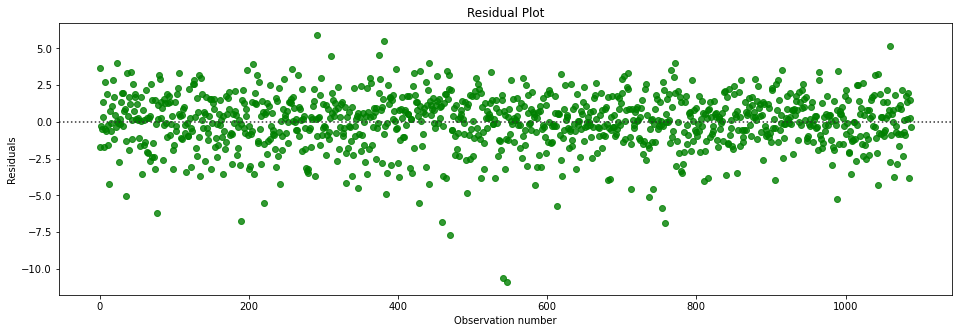

P-value: 1.1975094330236923e-05
Wykryto istotne dowody na heteroskedastyczność reszt.


In [1427]:
plt.figure(figsize=(16,5))
sns.residplot(x=np.arange(len(model2.resid)), y=model2.resid, lowess=False, color="g")
plt.title('Residual Plot')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

_, p_value, _, _ = het_breuschpagan(model2.resid, X3)
print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('Nie ma istotnych dowodów na heteroskedastyczność reszt.')
else:
    print('Wykryto istotne dowody na heteroskedastyczność reszt.')

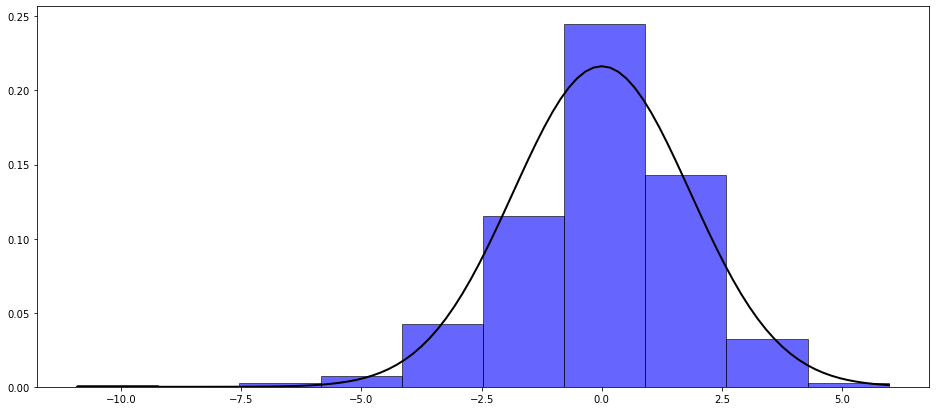

In [1428]:
plt.figure(figsize=(16,7))
plt.hist(model2.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model2.resid), max(model2.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model2.resid), np.std(model2.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [1429]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model2.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9669497609138489
Wartość P-Value: 4.9640497163945096e-15


In [1430]:
data_matrix.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
Yrs,1.000000,nan,-0.457267,0.972842,0.913516,0.825839,0.801196,0.674462,0.404390,0.184770,0.243334,0.508698,0.574830,0.619088,0.773774,0.683119,0.609713,0.477948,0.082123,0.112181
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.457267,nan,1.000000,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.120174,-0.130483
G,0.972842,nan,-0.466756,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.050958,0.086817
TOTMP,0.913516,nan,-0.490256,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,0.006150,0.044415
TOTPTS,0.825839,nan,-0.483405,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.010010,0.038069
TOTTRB,0.801196,nan,-0.454901,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.288206,0.317770
TOTAST,0.674462,nan,-0.370497,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.289270,-0.214330
FG%,0.404390,nan,-0.221541,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.373851,0.397973
3P%,0.184770,nan,-0.093182,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.383567,-0.389573


<br>

## Redukcja modelu podstawowego

In [1431]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1183.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:35   Log-Likelihood:                -1581.0
No. Observations:                1089   AIC:                             3200.
Df Residuals:                    1070   BIC:                             3295.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9459      1.319     -0.717      0.474      -3.534       1.643
x1            -0.0024      0.002     -0.970      0.332      -0.007       0.002
x2             0.0174      0.000     38.837      0.000       0.016       0.018
x3            -0.0001   3.47e-05     -4.248      0.000      -0.000   -7.94e-05
x4          2.238e-05    5.4e-05      0.414      0.679   -8.36e-05       0.000
x5         -2.186e-05   8.06e-05     -0.271      0.786      -0.000       0.000
x6         -7.914e-05      0.000     -0.706      0.481      -0.000       0.000
x7            -0.8436      0.906     -0.931      0.352      -2.621       0.934
x8            -0.0072      0.309     -0.023      0.981      -0.613       0.599
x9            -0.6658      0.380     -1.752      0.080      -1.412       0.080
x10            0.9202      1.579      0.583      0.560      -2.177       4.018
x11            0.0067      0.037      0.181      0.856      -0.066       0.079
x12            0.0079      0.007      1.070      0.285      -0.007       0.022
x13            0.0023      0.021      0.106      0.915      -0.040       0.044
x14            0.0310      0.039      0.803      0.422      -0.045       0.107
x15           -0.0112      0.065     -0.171      0.864      -0.139       0.117
x16            0.0679      0.086      0.785      0.433      -0.102       0.238
x17            0.0161      0.007      2.263      0.024       0.002       0.030
x18           -0.0003      0.005     -0.066      0.948      -0.010       0.009
==============================================================================
Omnibus:                      186.050   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.701
Skew:                           0.947   Prob(JB):                     2.68e-92
Kurtosis:                       5.388   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test na łączną istotność parametrów

In [1432]:
f_statistic = model.fvalue
p_value = model.f_pvalue

print(f'Wartość statystyki F: {f_statistic}')
print(f'Wartość p: {p_value}')

Wartość statystyki F: 1183.0194856676935
Wartość p: 0.0


<br>

##### Redukcja modelu

In [1433]:
X1_reduced = data_matrix.drop(['Yrs', 'Const', 'VORP', 'WS/48', 'Weight', 'PPG', 'BPM', 'RPG', '3P%', 'APG', 'TOTAST', 'FT%'], axis=1)

In [1434]:
X1_reduced = X1_reduced.astype(float)

In [1435]:
model1_reduced = sm.OLS(y1, sm.add_constant(X1_reduced)).fit()

In [1436]:
model1_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     913.5
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:35   Log-Likelihood:                -172.73
No. Observations:                1089   AIC:                             363.5
Df Residuals:                    1080   BIC:                             408.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7753      0.241     -3.210      0.001      -1.249      -0.301
Pk            -0.0028      0.001     -4.288      0.000      -0.004      -0.002
G              0.0038      0.000     33.985      0.000       0.004       0.004
TOTMP      -8.846e-05   6.39e-06    -13.848      0.000      -0.000   -7.59e-05
TOTPTS      2.276e-05   6.52e-06      3.492      0.000    9.97e-06    3.55e-05
TOTTRB     -3.336e-05   9.23e-06     -3.615      0.000   -5.15e-05   -1.53e-05
FG%            0.6884      0.170      4.052      0.000       0.355       1.022
MPG            0.0351      0.002     15.556      0.000       0.031       0.040
Height         0.0046      0.001      3.798      0.000       0.002       0.007
==============================================================================
Omnibus:                      109.062   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.588
Skew:                          -0.543   Prob(JB):                     2.63e-62
Kurtosis:                       5.252   Cond. No.                     4.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1437]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     413.8
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:35   Log-Likelihood:                -159.30
No. Observations:                1089   AIC:                             356.6
Df Residuals:                    1070   BIC:                             451.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6342      0.358     -1.774      0.076      -1.336       0.067
x1            -0.0026      0.001     -3.949      0.000      -0.004      -0.001
x2             0.0039      0.000     32.418      0.000       0.004       0.004
x3         -8.436e-05   9.42e-06     -8.959      0.000      -0.000   -6.59e-05
x4          4.414e-06   1.46e-05      0.301      0.763   -2.43e-05    3.31e-05
x5         -5.564e-05   2.18e-05     -2.548      0.011   -9.85e-05   -1.28e-05
x6          6.324e-06   3.04e-05      0.208      0.835   -5.33e-05     6.6e-05
x7             0.5006      0.245      2.039      0.042       0.019       0.982
x8             0.1557      0.084      1.860      0.063      -0.009       0.320
x9            -0.3409      0.103     -3.310      0.001      -0.543      -0.139
x10           -0.0910      0.428     -0.213      0.832      -0.931       0.748
x11            0.0017      0.010      0.169      0.866      -0.018       0.021
x12            0.0017      0.002      0.857      0.392      -0.002       0.006
x13            0.0254      0.006      4.388      0.000       0.014       0.037
x14            0.0147      0.010      1.399      0.162      -0.006       0.035
x15            0.0249      0.018      1.411      0.159      -0.010       0.060
x16            0.0145      0.023      0.617      0.537      -0.032       0.060
x17            0.0055      0.002      2.851      0.004       0.002       0.009
x18           -0.0006      0.001     -0.441      0.659      -0.003       0.002
==============================================================================
Omnibus:                       92.881   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.915
Skew:                          -0.476   Prob(JB):                     7.20e-51
Kurtosis:                       5.045   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1438]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yrs     1089 non-null   float64
 1   Const   1089 non-null   int64  
 2   Pk      1089 non-null   int64  
 3   G       1089 non-null   float64
 4   TOTMP   1089 non-null   float64
 5   TOTPTS  1089 non-null   float64
 6   TOTTRB  1089 non-null   float64
 7   TOTAST  1089 non-null   float64
 8   FG%     1089 non-null   float64
 9   3P%     1089 non-null   float64
 10  FT%     1089 non-null   float64
 11  WS/48   1089 non-null   float64
 12  BPM     1089 non-null   float64
 13  VORP    1089 non-null   float64
 14  MPG     1089 non-null   float64
 15  PPG     1089 non-null   float64
 16  RPG     1089 non-null   float64
 17  APG     1089 non-null   float64
 18  Height  1089 non-null   float64
 19  Weight  1089 non-null   Float64
dtypes: Float64(1), float64(17), int64(2)
memory usage: 179.7 KB


In [1439]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1183.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:35   Log-Likelihood:                -1581.0
No. Observations:                1089   AIC:                             3200.
Df Residuals:                    1070   BIC:                             3295.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9459      1.319     -0.717      0.474      -3.534       1.643
x1            -0.0024      0.002     -0.970      0.332      -0.007       0.002
x2             0.0174      0.000     38.837      0.000       0.016       0.018
x3            -0.0001   3.47e-05     -4.248      0.000      -0.000   -7.94e-05
x4          2.238e-05    5.4e-05      0.414      0.679   -8.36e-05       0.000
x5         -2.186e-05   8.06e-05     -0.271      0.786      -0.000       0.000
x6         -7.914e-05      0.000     -0.706      0.481      -0.000       0.000
x7            -0.8436      0.906     -0.931      0.352      -2.621       0.934
x8            -0.0072      0.309     -0.023      0.981      -0.613       0.599
x9            -0.6658      0.380     -1.752      0.080      -1.412       0.080
x10            0.9202      1.579      0.583      0.560      -2.177       4.018
x11            0.0067      0.037      0.181      0.856      -0.066       0.079
x12            0.0079      0.007      1.070      0.285      -0.007       0.022
x13            0.0023      0.021      0.106      0.915      -0.040       0.044
x14            0.0310      0.039      0.803      0.422      -0.045       0.107
x15           -0.0112      0.065     -0.171      0.864      -0.139       0.117
x16            0.0679      0.086      0.785      0.433      -0.102       0.238
x17            0.0161      0.007      2.263      0.024       0.002       0.030
x18           -0.0003      0.005     -0.066      0.948      -0.010       0.009
==============================================================================
Omnibus:                      186.050   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.701
Skew:                           0.947   Prob(JB):                     2.68e-92
Kurtosis:                       5.388   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1440]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yrs     1089 non-null   float64
 1   Const   1089 non-null   int64  
 2   Pk      1089 non-null   int64  
 3   G       1089 non-null   float64
 4   TOTMP   1089 non-null   float64
 5   TOTPTS  1089 non-null   float64
 6   TOTTRB  1089 non-null   float64
 7   TOTAST  1089 non-null   float64
 8   FG%     1089 non-null   float64
 9   3P%     1089 non-null   float64
 10  FT%     1089 non-null   float64
 11  WS/48   1089 non-null   float64
 12  BPM     1089 non-null   float64
 13  VORP    1089 non-null   float64
 14  MPG     1089 non-null   float64
 15  PPG     1089 non-null   float64
 16  RPG     1089 non-null   float64
 17  APG     1089 non-null   float64
 18  Height  1089 non-null   float64
 19  Weight  1089 non-null   Float64
dtypes: Float64(1), float64(17), int64(2)
memory usage: 179.7 KB


<br>

<BR>

## Podsumowanie

In [1441]:
for idx, p_value in enumerate(model1_reduced.pvalues):
    if p_value < 0.05:
        print(f'Parametr {model1_reduced.params.index[idx]} jest istotny (p-value: {p_value:.4f})\n')

Parametr const jest istotny (p-value: 0.0014)

Parametr Pk jest istotny (p-value: 0.0000)

Parametr G jest istotny (p-value: 0.0000)

Parametr TOTMP jest istotny (p-value: 0.0000)

Parametr TOTPTS jest istotny (p-value: 0.0005)

Parametr TOTTRB jest istotny (p-value: 0.0003)

Parametr FG% jest istotny (p-value: 0.0001)

Parametr MPG jest istotny (p-value: 0.0000)

Parametr Height jest istotny (p-value: 0.0002)



In [1442]:
print(f'P-value dla testu F: {model1_reduced.f_pvalue}')

P-value dla testu F: 0.0


In [1443]:
model1_reduced.params

const    -0.775296
Pk       -0.002840
G         0.003798
TOTMP    -0.000088
TOTPTS    0.000023
TOTTRB   -0.000033
FG%       0.688397
MPG       0.035082
Height    0.004586
dtype: float64

In [1444]:
model1_reduced.rsquared

0.8712487943556821

In [1445]:
data.describe()

,Pk,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,25.348026,7.810836,439.568411,10775.742883,4566.041322,1909.134986,989.013774,0.435245,0.263678,0.723619,0.067341,-1.851699,5.859871,19.291368,7.678696,3.331680,1.651974,200.226814,99.544536
std,15.679086,4.726824,337.299078,10660.702905,5343.792585,2217.242668,1448.967101,0.063727,0.134910,0.109183,0.075219,3.367011,13.293808,8.410446,4.918345,2.131706,1.497448,9.008624,12.497650
min,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.597000,-25.500000,-7.800000,2.500000,0.000000,0.000000,0.000000,175.000000,68.000000
25%,12.000000,3.000000,127.000000,1537.000000,453.000000,226.000000,94.000000,0.406000,0.196000,0.665000,0.035000,-3.500000,-0.500000,12.400000,3.900000,1.800000,0.600000,193.000000,91.000000
50%,24.000000,8.000000,414.000000,7592.000000,2568.000000,1232.000000,423.000000,0.435000,0.313000,0.740000,0.073000,-1.800000,0.200000,19.000000,6.600000,2.900000,1.200000,201.000000,100.000000
75%,38.000000,11.000000,689.000000,17284.000000,6849.000000,2784.000000,1271.000000,0.469000,0.354000,0.797000,0.104000,-0.100000,7.200000,25.800000,10.300000,4.400000,2.200000,206.000000,109.000000
max,60.000000,22.000000,1541.000000,51563.000000,36559.000000,15091.000000,12091.000000,1.000000,1.000000,1.000000,1.367000,51.100000,141.400000,41.100000,27.100000,13.400000,9.500000,229.000000,147.000000


<br>

## Model podstawowy

In [1446]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1183.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:36   Log-Likelihood:                -1581.0
No. Observations:                1089   AIC:                             3200.
Df Residuals:                    1070   BIC:                             3295.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9459      1.319     -0.717      0.474      -3.534       1.643
x1            -0.0024      0.002     -0.970      0.332      -0.007       0.002
x2             0.0174      0.000     38.837      0.000       0.016       0.018
x3            -0.0001   3.47e-05     -4.248      0.000      -0.000   -7.94e-05
x4          2.238e-05    5.4e-05      0.414      0.679   -8.36e-05       0.000
x5         -2.186e-05   8.06e-05     -0.271      0.786      -0.000       0.000
x6         -7.914e-05      0.000     -0.706      0.481      -0.000       0.000
x7            -0.8436      0.906     -0.931      0.352      -2.621       0.934
x8            -0.0072      0.309     -0.023      0.981      -0.613       0.599
x9            -0.6658      0.380     -1.752      0.080      -1.412       0.080
x10            0.9202      1.579      0.583      0.560      -2.177       4.018
x11            0.0067      0.037      0.181      0.856      -0.066       0.079
x12            0.0079      0.007      1.070      0.285      -0.007       0.022
x13            0.0023      0.021      0.106      0.915      -0.040       0.044
x14            0.0310      0.039      0.803      0.422      -0.045       0.107
x15           -0.0112      0.065     -0.171      0.864      -0.139       0.117
x16            0.0679      0.086      0.785      0.433      -0.102       0.238
x17            0.0161      0.007      2.263      0.024       0.002       0.030
x18           -0.0003      0.005     -0.066      0.948      -0.010       0.009
==============================================================================
Omnibus:                      186.050   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.701
Skew:                           0.947   Prob(JB):                     2.68e-92
Kurtosis:                       5.388   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1447]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yrs     1089 non-null   float64
 1   Const   1089 non-null   int64  
 2   Pk      1089 non-null   int64  
 3   G       1089 non-null   float64
 4   TOTMP   1089 non-null   float64
 5   TOTPTS  1089 non-null   float64
 6   TOTTRB  1089 non-null   float64
 7   TOTAST  1089 non-null   float64
 8   FG%     1089 non-null   float64
 9   3P%     1089 non-null   float64
 10  FT%     1089 non-null   float64
 11  WS/48   1089 non-null   float64
 12  BPM     1089 non-null   float64
 13  VORP    1089 non-null   float64
 14  MPG     1089 non-null   float64
 15  PPG     1089 non-null   float64
 16  RPG     1089 non-null   float64
 17  APG     1089 non-null   float64
 18  Height  1089 non-null   float64
 19  Weight  1089 non-null   Float64
dtypes: Float64(1), float64(17), int64(2)
memory usage: 179.7 KB


## Model ostateczny

In [1448]:
#X10_reduced = data_matrix.drop(['Yrs', '3P%', 'BPM', 'MPG','RPG', 'Weight', 'TOTPTS', 'TOTTRB', 'TOTAST'], axis=1)
X10_reduced = data_matrix.drop(['Yrs', '3P%', 'Weight', 'MPG', 'BPM', 'RPG', 'TOTPTS', 'TOTAST', 'APG', 'TOTTRB', 'Pk', 'FG%', 'WS/48', 'FT%', 'VORP'], axis=1)

In [1449]:
X10_reduced = X10_reduced.astype(float)

In [1450]:
model10_reduced = sm.OLS(y, X10_reduced).fit()

In [1451]:
model10_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     5334.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:36   Log-Likelihood:                -1586.8
No. Observations:                1089   AIC:                             3184.
Df Residuals:                    1084   BIC:                             3209.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const         -1.2603      0.713     -1.767      0.077      -2.659       0.139
G              0.0169      0.000     47.327      0.000       0.016       0.018
TOTMP         -0.0001   1.37e-05     -9.230      0.000      -0.000   -9.94e-05
PPG            0.0467      0.012      3.813      0.000       0.023       0.071
Height         0.0131      0.004      3.688      0.000       0.006       0.020
==============================================================================
Omnibus:                      183.706   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.268
Skew:                           0.940   Prob(JB):                     3.00e-90
Kurtosis:                       5.356   Cond. No.                     3.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

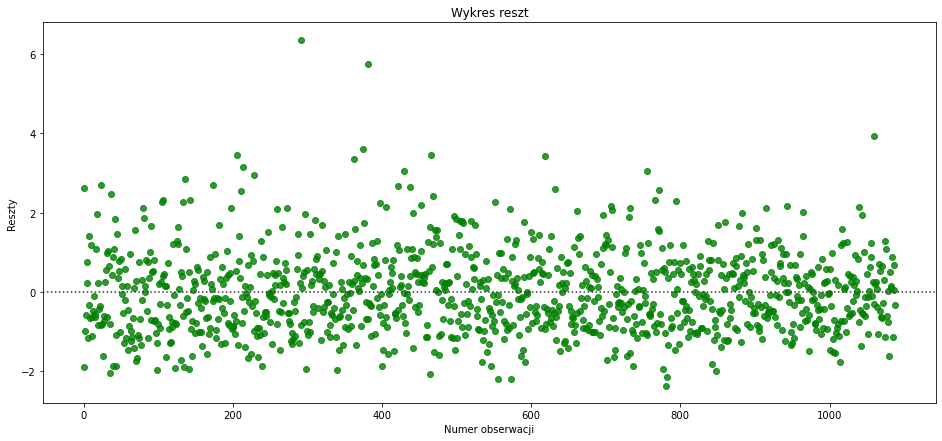

P-value: 0.02498530370189702
Wykryto istotne dowody na heteroskedastyczność reszt.


In [1452]:
plt.figure(figsize=(16,7))
sns.residplot(x=np.arange(len(model10_reduced.resid)), y=model10_reduced.resid, lowess=False, color="g")
plt.title('Wykres reszt')
plt.xlabel('Numer obserwacji')
plt.ylabel('Reszty')
plt.show()

#_, p_value, _, _ = het_breuschpagan(model.resid, X)
white_test = het_white(model10_reduced.resid, X10_reduced)
p_value = white_test[1]

print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('Nie ma istotnych dowodów na heteroskedastyczność reszt.')
else:
    print('Wykryto istotne dowody na heteroskedastyczność reszt.')

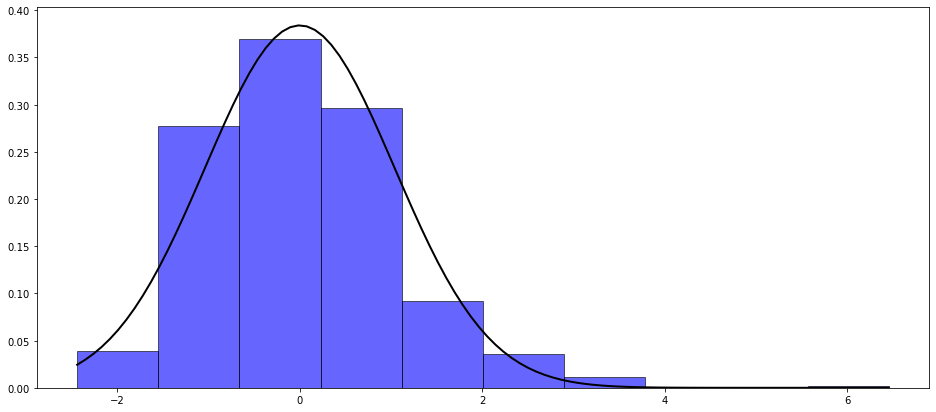

In [1453]:
plt.figure(figsize=(16,7))
plt.hist(model10_reduced.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model10_reduced.resid), max(model10_reduced.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model10_reduced.resid), np.std(model10_reduced.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [1454]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model10_reduced.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9595838785171509
Wartość P-Value: 8.599574788893189e-17


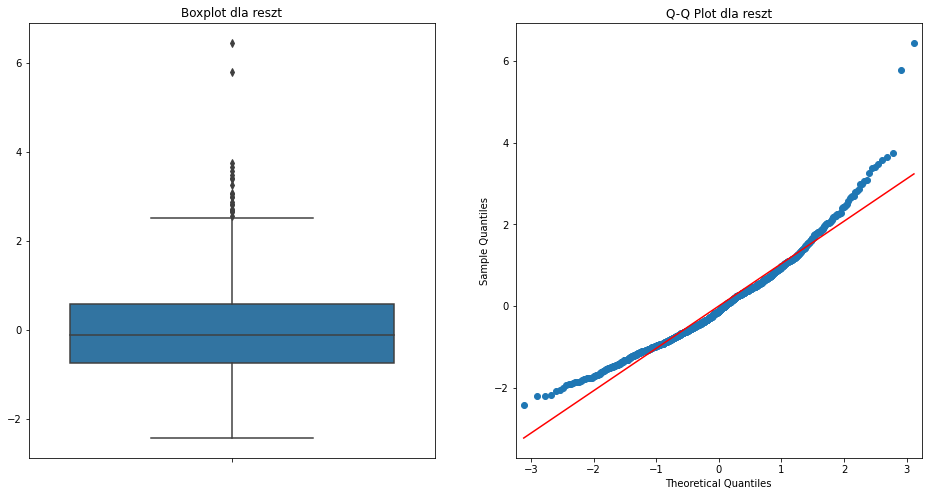

In [1455]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Boxplot dla reszt
sns.boxplot(y=model10_reduced.resid, ax=axs[0])
axs[0].set_title('Boxplot dla reszt')
#axs[0].set_xlabel('Wartość reszty')

# Q-Q plot dla reszt
sm.qqplot(model10_reduced.resid, line='s', ax=axs[1])
axs[1].set_title('Q-Q Plot dla reszt')

plt.show()

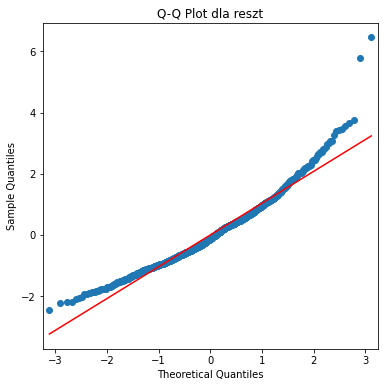

In [1456]:
fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(model10_reduced.resid, line='s', ax=ax)
ax.set_title('Q-Q Plot dla reszt')
plt.show()

<AxesSubplot:>

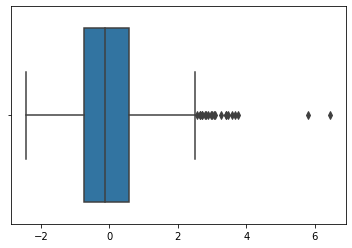

In [1457]:
sns.boxplot(x=model10_reduced.resid)

In [1458]:
statistic, p_value = ks_2samp(model10_reduced.resid, np.random.normal(loc=0, scale=1, size=len(model10_reduced.resid)))

# Wyświetlenie wyników testu
print(f'Statystyka testowa: {statistic}')
print(f'P-value: {p_value}')

Statystyka testowa: 0.05234159779614325
P-value: 0.10122151302342547


In [1459]:
data_matrix.describe()

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
count,1089.000000,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,7.810836,1.0,25.348026,439.568411,10775.742883,4566.041322,1909.134986,989.013774,0.435245,0.263678,0.723619,0.067341,-1.851699,5.859871,19.291368,7.678696,3.331680,1.651974,200.226814,99.544536
std,4.726824,0.0,15.679086,337.299078,10660.702905,5343.792585,2217.242668,1448.967101,0.063727,0.134910,0.109183,0.075219,3.367011,13.293808,8.410446,4.918345,2.131706,1.497448,9.008624,12.497650
min,1.000000,1.0,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.597000,-25.500000,-7.800000,2.500000,0.000000,0.000000,0.000000,175.000000,68.000000
25%,3.000000,1.0,12.000000,127.000000,1537.000000,453.000000,226.000000,94.000000,0.406000,0.196000,0.665000,0.035000,-3.500000,-0.500000,12.400000,3.900000,1.800000,0.600000,193.000000,91.000000
50%,8.000000,1.0,24.000000,414.000000,7592.000000,2568.000000,1232.000000,423.000000,0.435000,0.313000,0.740000,0.073000,-1.800000,0.200000,19.000000,6.600000,2.900000,1.200000,201.000000,100.000000
75%,11.000000,1.0,38.000000,689.000000,17284.000000,6849.000000,2784.000000,1271.000000,0.469000,0.354000,0.797000,0.104000,-0.100000,7.200000,25.800000,10.300000,4.400000,2.200000,206.000000,109.000000
max,22.000000,1.0,60.000000,1541.000000,51563.000000,36559.000000,15091.000000,12091.000000,1.000000,1.000000,1.000000,1.367000,51.100000,141.400000,41.100000,27.100000,13.400000,9.500000,229.000000,147.000000


In [1460]:
# Macierz kowariancji
model10_reduced.cov_params()

,Const,G,TOTMP,PPG,Height
Const,5.084962e-01,1.118477e-05,1.672473e-08,-1.156136e-03,-2.515745e-03
G,1.118477e-05,1.282515e-07,-4.533639e-09,1.714024e-06,-1.591607e-07
TOTMP,1.672473e-08,-4.533639e-09,1.871796e-10,-1.085715e-07,3.959552e-09
PPG,-1.156136e-03,1.714024e-06,-1.085715e-07,1.497660e-04,2.110791e-06
Height,-2.515745e-03,-1.591607e-07,3.959552e-09,2.110791e-06,1.261985e-05


<br>

In [1461]:
test_df = pd.read_excel(r'C:\Users\GRZEGORZ\OneDrive\Pulpit\NBA data test.xlsx')
test_df.head()

,Player,Yrs,G,TOTMP,TOTPTS,PPG,WS/48,Height
0,Pervis Ellison,11,474,11593,4494,9.481013,0.090,6-9
1,Danny Ferry,13,917,18133,6439,7.021810,0.092,6-10
2,Sean Elliott,12,742,24502,10544,14.210243,0.109,6-8
3,Glen Rice,15,1000,34985,18336,18.336000,0.122,6-8
4,J.R. Reid,11,672,15370,5680,8.452381,0.070,6-9


In [1462]:
def height_to_cm(height):
    feet, inches = map(int, height.split('-'))
    total_inches = feet * 12 + inches
    cm = total_inches * 2.54
    return cm

# Zastosowanie funkcji do kolumny 'Wzrost'
test_df['Height'] = test_df['Height'].apply(height_to_cm)
test_df['Height'] = round(test_df['Height'])

In [1463]:
a = test_df.drop(['WS/48', 'TOTPTS'], axis=1)

In [1464]:
a['PPG'] = a['PPG'].round(2)

a.head()

,Player,Yrs,G,TOTMP,PPG,Height
0,Pervis Ellison,11,474,11593,9.48,206.0
1,Danny Ferry,13,917,18133,7.02,208.0
2,Sean Elliott,12,742,24502,14.21,203.0
3,Glen Rice,15,1000,34985,18.34,203.0
4,J.R. Reid,11,672,15370,8.45,206.0


In [1465]:
y_test = test_df['Yrs'].to_numpy()

In [1466]:
test_df = test_df.drop(['WS/48', 'TOTPTS'], axis=1)

In [1467]:
X_test = test_df.iloc[:,2:].values
X_test = X_test.astype(float)

In [1468]:
predictions = model10_reduced.predict(sm.add_constant(X_test))

In [1469]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.9657485088356896
R-squared: 0.9630358334175915


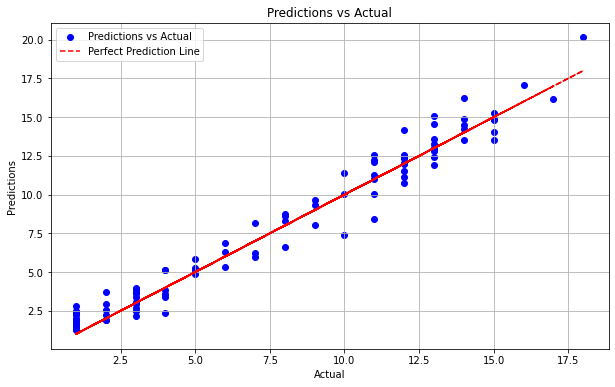

In [1470]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predictions vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()

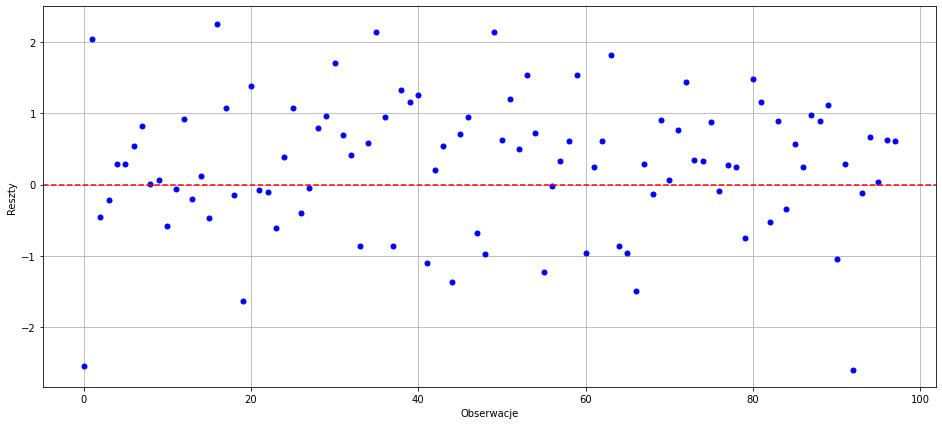

In [1471]:
errors = predictions - y_test

# Stwórz wykres błędów
plt.figure(figsize=(16, 7))
plt.plot(np.arange(len(errors)), errors, marker='o', linestyle='', color='blue', markersize=5)
plt.axhline(y=0, color='red', linestyle='--')
#plt.title('Prediction Errors')
plt.xlabel('Obserwacje')
plt.ylabel('Reszty')
plt.grid(True)
plt.show()

In [1472]:
pd.DataFrame({'Mean Squared Error:': [mse],
        'R-squared:': [r2]}).transpose()

,0
Mean Squared Error:,0.965749
R-squared:,0.963036


In [1473]:
model10_reduced.conf_int()

,0,1
Const,-2.659453,0.138930
G,0.016246,0.017652
TOTMP,-0.000153,-0.000099
PPG,0.022648,0.070674
Height,0.006131,0.020072


<br>

In [1474]:
pd.DataFrame({
    'AIC': [model.aic, model10_reduced.aic],
    'BIC': [model.bic, model10_reduced.bic]
}, index=['Podstawowy', 'Ostateczny']).transpose()

,Podstawowy,Ostateczny
AIC,3200.080991,3183.586992
BIC,3294.948278,3208.552068


In [1475]:
model10_reduced.conf_int()

,0,1
Const,-2.659453,0.138930
G,0.016246,0.017652
TOTMP,-0.000153,-0.000099
PPG,0.022648,0.070674
Height,0.006131,0.020072


In [1476]:
statistic, p_value = stats.kstest(model10_reduced.resid, 'norm')

print("Statystyka testowa D =", statistic)
print("P-wartość =", p_value)

Statystyka testowa D = 0.05857091221855554
P-wartość = 0.001089693148642103


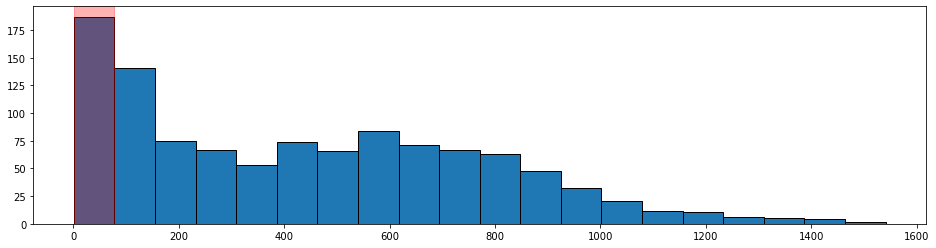

In [1477]:
plt.figure(figsize=(16,4))
hist, bins, _ = plt.hist(data_matrix['G'], bins=20, edgecolor='black')

# Znalezienie przedziału z największą ilością obserwacji
max_bin_index = np.argmax(hist)
max_bin = (bins[max_bin_index], bins[max_bin_index + 1])
plt.axvspan(max_bin[0], max_bin[1], color='red', alpha=0.3, label=f'Max bin: {max_bin}')

In [1478]:
for i in range(20):
    bin_start, bin_end = bins[i], bins[i + 1]
    bin_count = hist[i]
    print(f"({bin_start:.2f}, {bin_end:.2f}), Ilość obserwacji: {bin_count}")

(1.00, 78.00), Ilość obserwacji: 187.0
(78.00, 155.00), Ilość obserwacji: 141.0
(155.00, 232.00), Ilość obserwacji: 75.0
(232.00, 309.00), Ilość obserwacji: 67.0
(309.00, 386.00), Ilość obserwacji: 53.0
(386.00, 463.00), Ilość obserwacji: 74.0
(463.00, 540.00), Ilość obserwacji: 66.0
(540.00, 617.00), Ilość obserwacji: 84.0
(617.00, 694.00), Ilość obserwacji: 71.0
(694.00, 771.00), Ilość obserwacji: 67.0
(771.00, 848.00), Ilość obserwacji: 63.0
(848.00, 925.00), Ilość obserwacji: 48.0
(925.00, 1002.00), Ilość obserwacji: 32.0
(1002.00, 1079.00), Ilość obserwacji: 21.0
(1079.00, 1156.00), Ilość obserwacji: 12.0
(1156.00, 1233.00), Ilość obserwacji: 11.0
(1233.00, 1310.00), Ilość obserwacji: 6.0
(1310.00, 1387.00), Ilość obserwacji: 5.0
(1387.00, 1464.00), Ilość obserwacji: 4.0
(1464.00, 1541.00), Ilość obserwacji: 2.0


In [1479]:
data_matrix_G155 = data_matrix[data_matrix['G'] <= 155]
data_matrix_G155

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
7,3.0,1,8,105.0,1336.0,574.0,162.0,98.0,0.386,0.291,0.728,0.004,-5.7,-1.2,12.7,5.5,1.5,0.9,193.0,86.0
13,3.0,1,14,115.0,2964.0,1273.0,233.0,326.0,0.410,0.362,0.749,0.039,-2.6,-0.5,25.8,11.1,2.0,2.8,188.0,86.0
14,3.0,1,15,90.0,594.0,306.0,77.0,61.0,0.392,0.277,0.860,0.018,-3.9,-0.3,6.6,3.4,0.9,0.7,196.0,86.0
32,3.0,1,26,142.0,1045.0,289.0,110.0,117.0,0.436,0.253,0.667,0.031,-3.2,-0.3,7.4,2.0,0.8,0.8,193.0,86.0
34,2.0,1,28,52.0,192.0,53.0,67.0,2.0,0.333,0.000,0.650,0.031,-8.0,-0.3,3.7,1.0,1.3,0.0,213.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,4.0,1,51,116.0,1044.0,325.0,227.0,80.0,0.491,0.157,0.522,0.062,-3.7,-0.5,9.0,2.8,2.0,0.7,198.0,99.0
1575,1.0,1,55,64.0,973.0,183.0,87.0,130.0,0.345,0.190,0.548,0.006,-5.1,-0.8,15.2,2.9,1.4,2.0,190.0,86.0
1576,2.0,1,56,44.0,457.0,97.0,69.0,29.0,0.304,0.222,0.375,-0.028,-5.5,-0.4,10.4,2.2,1.6,0.7,198.0,91.0
1578,4.0,1,58,123.0,1696.0,846.0,225.0,167.0,0.417,0.355,0.772,0.048,-2.1,0.0,13.8,6.9,1.8,1.4,196.0,81.0


In [1480]:
y_G155 = data_matrix_G155['Yrs'].to_numpy()

In [1481]:
X_G155 = data_matrix_G155.iloc[:, 1:].values
X_G155 = X_G155.astype(float)

In [1482]:
model_G155 = sm.OLS(y_G155, X_G155).fit()

In [1483]:
model_G155.cov_params()

array([[ 3.31201170e+00, -1.01730067e-03, -7.00936096e-04,
         1.80005634e-05,  1.47235519e-04, -3.71801825e-05,
         3.72373211e-04, -1.33116836e-01, -4.60334020e-02,
        -1.28945713e-01,  3.14482128e-01, -4.43570463e-03,
         5.80140937e-03,  7.15362943e-04, -1.67014385e-02,
         4.25809110e-02, -1.38261562e-01, -1.71077005e-02,
         3.37647148e-03],
       [-1.01730067e-03,  1.49360456e-05,  9.73563859e-07,
        -5.70643360e-08,  8.62200587e-08,  3.92230768e-07,
        -2.42843539e-08, -2.67167140e-04,  1.58727834e-05,
         9.37727847e-05,  1.15471233e-04, -2.87055215e-06,
        -4.38040788e-05, -5.16652706e-06,  1.94820178e-05,
        -3.02107881e-05,  8.00912782e-06,  1.67292076e-06,
         9.61772264e-07],
       [-7.00936096e-04,  9.73563859e-07,  9.93508430e-06,
        -5.83300907e-07, -9.79307536e-08, -5.14306071e-07,
        -8.96390582e-07, -4.23336121e-04,  4.93398884e-05,
        -1.59989117e-04, -6.72511021e-05, -1.74081569e-06,
    

<br>

In [1484]:
data_matrix.describe()

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
count,1089.000000,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,7.810836,1.0,25.348026,439.568411,10775.742883,4566.041322,1909.134986,989.013774,0.435245,0.263678,0.723619,0.067341,-1.851699,5.859871,19.291368,7.678696,3.331680,1.651974,200.226814,99.544536
std,4.726824,0.0,15.679086,337.299078,10660.702905,5343.792585,2217.242668,1448.967101,0.063727,0.134910,0.109183,0.075219,3.367011,13.293808,8.410446,4.918345,2.131706,1.497448,9.008624,12.497650
min,1.000000,1.0,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.597000,-25.500000,-7.800000,2.500000,0.000000,0.000000,0.000000,175.000000,68.000000
25%,3.000000,1.0,12.000000,127.000000,1537.000000,453.000000,226.000000,94.000000,0.406000,0.196000,0.665000,0.035000,-3.500000,-0.500000,12.400000,3.900000,1.800000,0.600000,193.000000,91.000000
50%,8.000000,1.0,24.000000,414.000000,7592.000000,2568.000000,1232.000000,423.000000,0.435000,0.313000,0.740000,0.073000,-1.800000,0.200000,19.000000,6.600000,2.900000,1.200000,201.000000,100.000000
75%,11.000000,1.0,38.000000,689.000000,17284.000000,6849.000000,2784.000000,1271.000000,0.469000,0.354000,0.797000,0.104000,-0.100000,7.200000,25.800000,10.300000,4.400000,2.200000,206.000000,109.000000
max,22.000000,1.0,60.000000,1541.000000,51563.000000,36559.000000,15091.000000,12091.000000,1.000000,1.000000,1.000000,1.367000,51.100000,141.400000,41.100000,27.100000,13.400000,9.500000,229.000000,147.000000


In [1485]:
data_matrix[data_matrix['G'] < 5]

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
180,1.0,1,52,2.0,12.0,3.0,3.0,2.0,0.250,0.00,0.5,-0.126,-8.5,0.0,6.0,1.5,1.5,1.0,201.0,102.0
270,1.0,1,34,4.0,42.0,15.0,5.0,1.0,0.333,0.00,1.0,0.076,-1.2,0.0,10.5,3.8,1.3,0.3,190.0,86.0
557,1.0,1,40,3.0,15.0,13.0,4.0,1.0,0.500,0.25,1.0,0.280,9.4,0.0,5.0,4.3,1.3,0.3,201.0,97.0
564,1.0,1,47,1.0,3.0,4.0,0.0,2.0,1.000,1.00,0.5,1.367,51.1,0.0,3.0,4.0,0.0,2.0,178.0,75.0
620,1.0,1,45,1.0,25.0,5.0,0.0,0.0,0.333,0.00,1.0,-0.022,-5.4,0.0,25.0,5.0,0.0,0.0,196.0,86.0
1121,1.0,1,42,2.0,37.0,10.0,11.0,1.0,0.273,0.00,1.0,0.147,-4.7,0.0,18.5,5.0,5.5,0.5,201.0,100.0
1197,1.0,1,58,2.0,23.0,9.0,4.0,1.0,0.300,0.25,1.0,0.037,-2.7,0.0,11.5,4.5,2.0,0.5,196.0,95.0
1319,1.0,1,53,3.0,21.0,7.0,3.0,2.0,0.333,0.00,1.0,-0.047,-6.0,0.0,7.0,2.3,1.0,0.7,201.0,102.0


In [1486]:
model10_reduced.rsquared

0.9516478166058258

In [1487]:
model.rsquared

0.9521559998614372

In [1488]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1183.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:40   Log-Likelihood:                -1581.0
No. Observations:                1089   AIC:                             3200.
Df Residuals:                    1070   BIC:                             3295.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9459      1.319     -0.717      0.474      -3.534       1.643
x1            -0.0024      0.002     -0.970      0.332      -0.007       0.002
x2             0.0174      0.000     38.837      0.000       0.016       0.018
x3            -0.0001   3.47e-05     -4.248      0.000      -0.000   -7.94e-05
x4          2.238e-05    5.4e-05      0.414      0.679   -8.36e-05       0.000
x5         -2.186e-05   8.06e-05     -0.271      0.786      -0.000       0.000
x6         -7.914e-05      0.000     -0.706      0.481      -0.000       0.000
x7            -0.8436      0.906     -0.931      0.352      -2.621       0.934
x8            -0.0072      0.309     -0.023      0.981      -0.613       0.599
x9            -0.6658      0.380     -1.752      0.080      -1.412       0.080
x10            0.9202      1.579      0.583      0.560      -2.177       4.018
x11            0.0067      0.037      0.181      0.856      -0.066       0.079
x12            0.0079      0.007      1.070      0.285      -0.007       0.022
x13            0.0023      0.021      0.106      0.915      -0.040       0.044
x14            0.0310      0.039      0.803      0.422      -0.045       0.107
x15           -0.0112      0.065     -0.171      0.864      -0.139       0.117
x16            0.0679      0.086      0.785      0.433      -0.102       0.238
x17            0.0161      0.007      2.263      0.024       0.002       0.030
x18           -0.0003      0.005     -0.066      0.948      -0.010       0.009
==============================================================================
Omnibus:                      186.050   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.701
Skew:                           0.947   Prob(JB):                     2.68e-92
Kurtosis:                       5.388   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

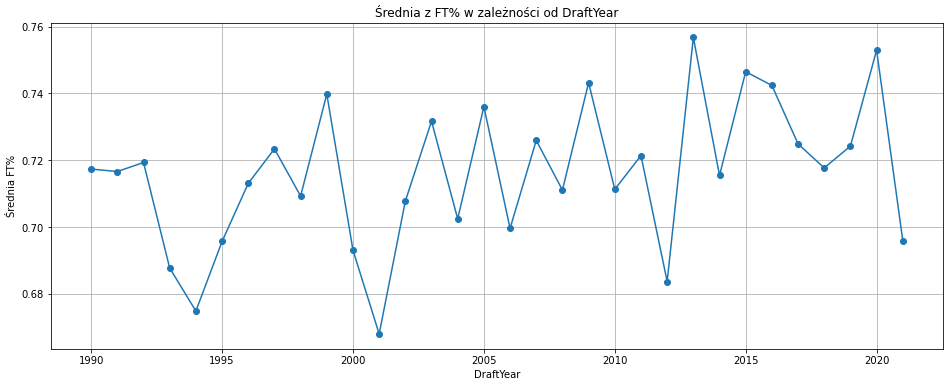

In [1489]:
average_ft_percentage = merged_df.groupby('DraftYear')['FT%'].mean()

# Przedstaw wyniki na wykresie liniowym
plt.figure(figsize=(16, 6))
plt.plot(average_ft_percentage.index, average_ft_percentage.values, marker='o', linestyle='-')
plt.title('Średnia z FT% w zależności od DraftYear')
plt.xlabel('DraftYear')
plt.ylabel('Średnia FT%')
plt.grid(True)
plt.show()

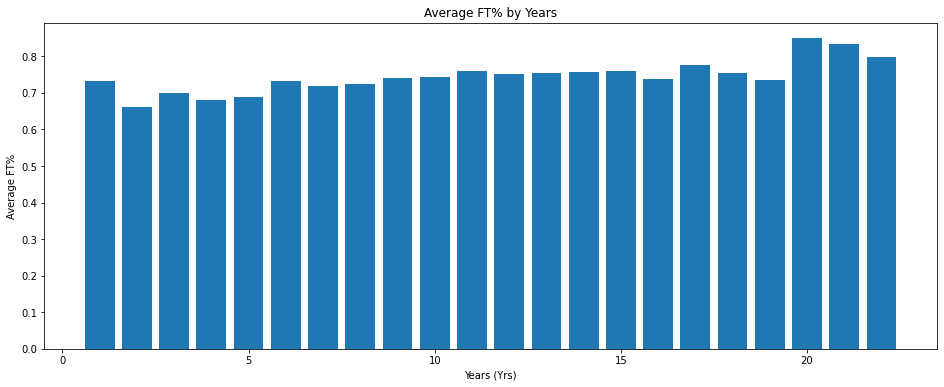

    Years (Yrs)  Average FT%  Number of Players
0           1.0     0.732290                 69
1           2.0     0.660091                110
2           3.0     0.700787                 94
3           4.0     0.680337                 92
4           5.0     0.688220                 50
5           6.0     0.732138                 58
6           7.0     0.719608                 51
7           8.0     0.723195                 77
8           9.0     0.740507                 69
9          10.0     0.744469                 81
10         11.0     0.760216                 74
11         12.0     0.750458                 59
12         13.0     0.755174                 69
13         14.0     0.758039                 51
14         15.0     0.760130                 23
15         16.0     0.738474                 19
16         17.0     0.774929                 14
17         18.0     0.754467                 15
18         19.0     0.735000                  9
19         20.0     0.849500            

In [1490]:
grouped_data = data_matrix.groupby('Yrs')['FT%'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(16,6))
plt.bar(grouped_data['Yrs'], grouped_data['mean'])
plt.xlabel('Years (Yrs)')
plt.ylabel('Average FT%')
plt.title('Average FT% by Years')
plt.show()


table_data = pd.DataFrame({
    'Years (Yrs)': grouped_data['Yrs'],
    'Average FT%': grouped_data['mean'],
    'Number of Players': grouped_data['count']
})

print(table_data)

In [1491]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pk          1089 non-null   int64         
 1   Tm          1089 non-null   object        
 2   Player      1089 non-null   object        
 3   Yrs         1089 non-null   float64       
 4   G           1089 non-null   float64       
 5   TOTMP       1089 non-null   float64       
 6   TOTPTS      1089 non-null   float64       
 7   TOTTRB      1089 non-null   float64       
 8   TOTAST      1089 non-null   float64       
 9   FG%         1089 non-null   float64       
 10  3P%         1089 non-null   float64       
 11  FT%         1089 non-null   float64       
 12  WS/48       1089 non-null   float64       
 13  BPM         1089 non-null   float64       
 14  VORP        1089 non-null   float64       
 15  MPG         1089 non-null   float64       
 16  PPG         1089 non-nul

In [1492]:
j = data.iloc[:,:-1].drop(columns=[data.columns[1]])
j

,Pk,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
0,1,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,0.119,1.4,22.3,33.2,16.5,9.3,2.5,208.0,104.0
1,2,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,0.148,3.3,62.5,35.3,16.3,3.9,6.7,193.0,82.0
2,3,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,185.0,73.0
3,4,Dennis Scott,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,0.089,0.2,9.9,28.6,12.9,2.8,2.1,203.0,104.0
4,5,Kendall Gill,15.0,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,0.078,0.1,15.8,30.5,13.4,4.1,3.0,196.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,51,Thanasis Antetokounmpo,4.0,116.0,1044.0,325.0,227.0,80.0,0.491,0.157,0.522,0.062,-3.7,-0.5,9.0,2.8,2.0,0.7,198.0,99.0
1575,55,Semaj Christon,1.0,64.0,973.0,183.0,87.0,130.0,0.345,0.190,0.548,0.006,-5.1,-0.8,15.2,2.9,1.4,2.0,190.0,86.0
1576,56,Devyn Marble,2.0,44.0,457.0,97.0,69.0,29.0,0.304,0.222,0.375,-0.028,-5.5,-0.4,10.4,2.2,1.6,0.7,198.0,91.0
1578,58,Jordan McRae,4.0,123.0,1696.0,846.0,225.0,167.0,0.417,0.355,0.772,0.048,-2.1,0.0,13.8,6.9,1.8,1.4,196.0,81.0


In [1493]:
#j.pop('Pk')
j.insert(2, 'Pk', j.pop('Pk'))

In [1494]:
j.head()

,Player,Yrs,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
0,Derrick Coleman,15.0,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,0.119,1.4,22.3,33.2,16.5,9.3,2.5,208.0,104.0
1,Gary Payton,17.0,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,0.148,3.3,62.5,35.3,16.3,3.9,6.7,193.0,82.0
2,Mahmoud Abdul-Rauf,9.0,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,185.0,73.0
3,Dennis Scott,10.0,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,0.089,0.2,9.9,28.6,12.9,2.8,2.1,203.0,104.0
4,Kendall Gill,15.0,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,0.078,0.1,15.8,30.5,13.4,4.1,3.0,196.0,88.0


In [1495]:
data_matrix['G'].describe()

count    1089.000000
mean      439.568411
std       337.299078
min         1.000000
25%       127.000000
50%       414.000000
75%       689.000000
max      1541.000000
Name: G, dtype: float64

In [1496]:
j[j['Player'] == 'Kobe Bryant']

,Player,Yrs,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
382,Kobe Bryant,20.0,13,1346.0,48637.0,33643.0,7047.0,6306.0,0.447,0.329,0.837,0.17,4.6,80.1,36.1,25.0,5.2,4.7,198.0,96.0


In [1497]:
j[j['Player'] == 'LeBron James']

,Player,Yrs,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
816,LeBron James,19.0,1,1351.0,51563.0,36559.0,10075.0,9962.0,0.505,0.345,0.734,0.231,8.9,141.4,38.2,27.1,7.5,7.4,206.0,113.0


In [1498]:
data_matrix.describe()

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
count,1089.000000,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,7.810836,1.0,25.348026,439.568411,10775.742883,4566.041322,1909.134986,989.013774,0.435245,0.263678,0.723619,0.067341,-1.851699,5.859871,19.291368,7.678696,3.331680,1.651974,200.226814,99.544536
std,4.726824,0.0,15.679086,337.299078,10660.702905,5343.792585,2217.242668,1448.967101,0.063727,0.134910,0.109183,0.075219,3.367011,13.293808,8.410446,4.918345,2.131706,1.497448,9.008624,12.497650
min,1.000000,1.0,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.597000,-25.500000,-7.800000,2.500000,0.000000,0.000000,0.000000,175.000000,68.000000
25%,3.000000,1.0,12.000000,127.000000,1537.000000,453.000000,226.000000,94.000000,0.406000,0.196000,0.665000,0.035000,-3.500000,-0.500000,12.400000,3.900000,1.800000,0.600000,193.000000,91.000000
50%,8.000000,1.0,24.000000,414.000000,7592.000000,2568.000000,1232.000000,423.000000,0.435000,0.313000,0.740000,0.073000,-1.800000,0.200000,19.000000,6.600000,2.900000,1.200000,201.000000,100.000000
75%,11.000000,1.0,38.000000,689.000000,17284.000000,6849.000000,2784.000000,1271.000000,0.469000,0.354000,0.797000,0.104000,-0.100000,7.200000,25.800000,10.300000,4.400000,2.200000,206.000000,109.000000
max,22.000000,1.0,60.000000,1541.000000,51563.000000,36559.000000,15091.000000,12091.000000,1.000000,1.000000,1.000000,1.367000,51.100000,141.400000,41.100000,27.100000,13.400000,9.500000,229.000000,147.000000


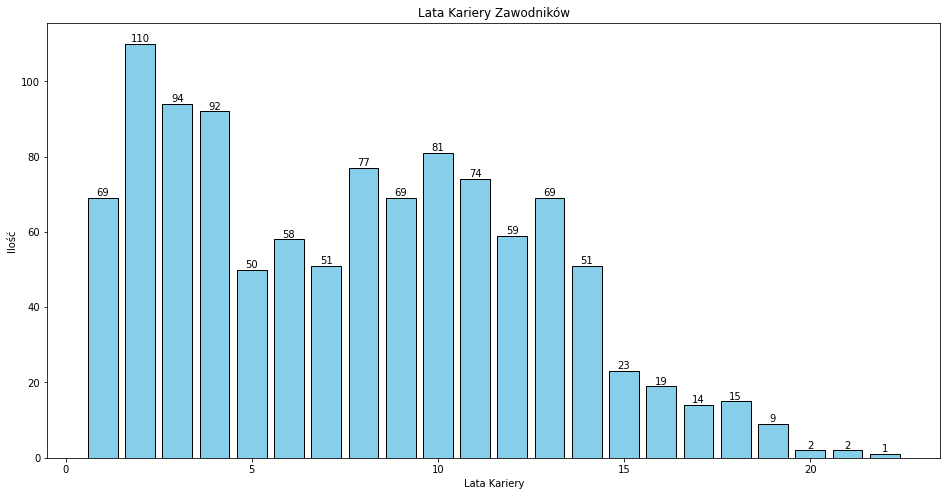

In [1499]:
import matplotlib.pyplot as plt

# Załóżmy, że data_matrix to DataFrame zawierający kolumnę 'Yrs'

plt.figure(figsize=(16, 8))
bars = plt.bar(data_matrix['Yrs'].value_counts().index, data_matrix['Yrs'].value_counts().values, color='skyblue', edgecolor='black')
plt.xlabel('Lata Kariery')
plt.ylabel('Ilość')
plt.title('Lata Kariery Zawodników')

# Dodaj etykiety do słupków wewnątrz słupków
for bar in bars:
    yval = bar.get_height()  # Wartość na osi Y dla danego słupka
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()



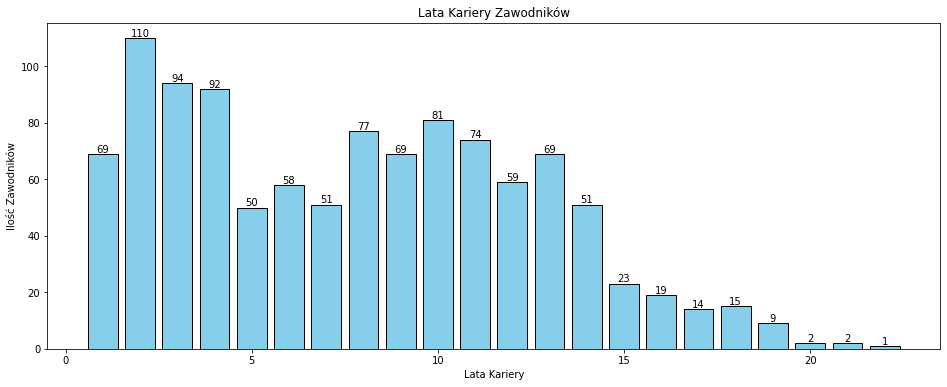

In [1500]:
import matplotlib.pyplot as plt

# Załóżmy, że data_matrix to DataFrame zawierający kolumnę 'Yrs'

plt.figure(figsize=(16, 6))
bars = plt.bar(data_matrix['Yrs'].value_counts().index, data_matrix['Yrs'].value_counts().values, color='skyblue', edgecolor='black')
plt.xlabel('Lata Kariery')
plt.ylabel('Ilość Zawodników')
plt.title('Lata Kariery Zawodników')

# Dodaj etykiety do słupków wewnątrz słupków
for bar in bars:
    yval = bar.get_height()  # Wartość na osi Y dla danego słupka
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    #plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 2), ha='center', va='center', color='white', weight='bold')  # Dodaj etykietę wewnątrz słupka

plt.show()


In [1501]:
data_matrix['Yrs'].value_counts()

2.0     110
3.0      94
4.0      92
10.0     81
8.0      77
11.0     74
13.0     69
9.0      69
1.0      69
12.0     59
6.0      58
7.0      51
14.0     51
5.0      50
15.0     23
16.0     19
18.0     15
17.0     14
19.0      9
21.0      2
20.0      2
22.0      1
Name: Yrs, dtype: int64

In [1502]:
data_matrix['Yrs'].describe()

count    1089.000000
mean        7.810836
std         4.726824
min         1.000000
25%         3.000000
50%         8.000000
75%        11.000000
max        22.000000
Name: Yrs, dtype: float64

In [1503]:
stats = {
    'mean': 7.81,
    'std': 4.73,
    'min': 1.000000,
    '25%': 3.000000,
    '50%': 8.000000,
    '75%': 11.000000,
    'max': 22.000000
}

# Tworzenie DataFrame z jednym wierszem
pd.DataFrame(stats, index=[0])

,mean,std,min,25%,50%,75%,max
0,7.81,4.73,1.0,3.0,8.0,11.0,22.0


In [1504]:
import statsmodels.api as sm

# Przykładowe dane
#X = ... # dane wejściowe
#y = ... # dane wyjściowe

# Dopasowanie modelu
#model = sm.OLS(y, X).fit()

# Funkcja do wykonania selekcji wstecznej
def stepwise_backward_selection(model):
    while True:
        # Obliczanie kryterium informacyjnego dla obecnego modelu
        aic = model.aic
        bic = model.bic

        # Wybieranie zmiennej do usunięcia
        worst_variable_index = np.argmax(model.pvalues)
        
        # Warunek zakończenia pętli - nie ma zmiennych do usunięcia lub poprawa kryterium informacyjnego jest niewielka
        if worst_variable_index == 0 or model.pvalues.max() < 0.05:
            break
        
        # Usunięcie najgorszej zmiennej
        X = model.model.exog
        X = np.delete(X, worst_variable_index, axis=1)
        model = sm.OLS(y, X).fit()
        
    return model

# Wykonanie selekcji wstecznej
reduced_model = stepwise_backward_selection(model)

# Wyświetlenie statystyk nowego modelu
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1784.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:42   Log-Likelihood:                -1581.2
No. Observations:                1089   AIC:                             3188.
Df Residuals:                    1076   BIC:                             3253.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7359      1.196     -0.616      0.538      -3.082       1.610
x1            -0.0023      0.002     -0.941      0.347      -0.007       0.002
x2             0.0174      0.000     39.503      0.000       0.017       0.018
x3            -0.0001   2.11e-05     -6.548      0.000      -0.000   -9.66e-05
x4         -3.744e-05   4.17e-05     -0.898      0.370      -0.000    4.44e-05
x5         -8.116e-05   9.65e-05     -0.841      0.400      -0.000       0.000
x6            -0.9109      0.881     -1.034      0.301      -2.639       0.817
x7            -0.6770      0.356     -1.903      0.057      -1.375       0.021
x8             1.1190      0.733      1.527      0.127      -0.319       2.557
x9             0.0105      0.006      1.802      0.072      -0.001       0.022
x10            0.0399      0.016      2.430      0.015       0.008       0.072
x11            0.0608      0.071      0.851      0.395      -0.079       0.201
x12            0.0148      0.006      2.679      0.007       0.004       0.026
==============================================================================
Omnibus:                      186.135   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.658
Skew:                           0.947   Prob(JB):                     1.66e-92
Kurtosis:                       5.393   Cond. No.                     6.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1505]:
data_matrix.groupby('Yrs')['TOTMP'].mean()

Yrs
1.0       283.724638
2.0       699.645455
3.0      1426.478723
4.0      2203.260870
5.0      3341.160000
6.0      5234.293103
7.0      6514.313725
8.0     10144.597403
9.0     11799.434783
10.0    14144.172840
11.0    15530.675676
12.0    17936.389831
13.0    21975.405797
14.0    23695.294118
15.0    28310.173913
16.0    29773.789474
17.0    32741.785714
18.0    34941.933333
19.0    43354.777778
20.0    43815.500000
21.0    50893.000000
22.0    46367.000000
Name: TOTMP, dtype: float64

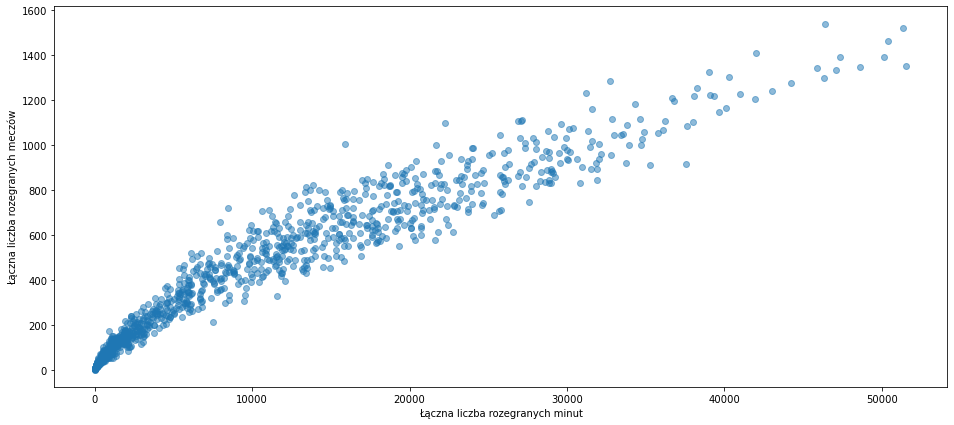

In [1506]:
plt.figure(figsize=(16, 7))  # Opcjonalnie, ustawienie rozmiaru wykresu

plt.scatter(data_matrix['TOTMP'], data_matrix['G'], alpha=0.5)  # Tworzenie scatter plot
#plt.title('Scatter plot: TOTMP vs G')  # Tytuł wykresu
plt.xlabel('Łączna liczba rozegranych minut')  # Etykieta osi x
plt.ylabel('Łączna liczba rozegranych meczów')  # Etykieta osi y

plt.show()  # Pokazanie wykresu

In [1507]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data_matrix['TOTMP'], data_matrix['G'])

# Tworzenie linii trendu
x_values = np.array(df['TOTMP'])
y_values = slope * x_values + intercept

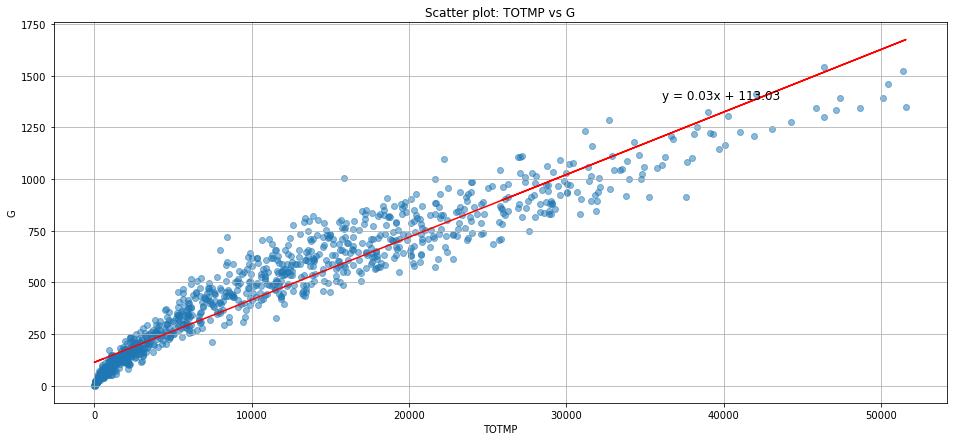

In [1508]:
plt.figure(figsize=(16, 7))
plt.scatter(data_matrix['TOTMP'], data_matrix['G'], alpha=0.5)
plt.plot(x_values, y_values, color='red', label='Trend line')
plt.title('Scatter plot: TOTMP vs G')
plt.xlabel('TOTMP')
plt.ylabel('G')
plt.grid(True)
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(df['TOTMP'].max() * 0.7, df['G'].max() * 0.9, equation_text, fontsize=12, color='black')
plt.show()

In [1509]:
data['avg_minutes'] = data['TOTMP'] / data['G']

# Obliczanie średniej z avg_minutes w podziale na Yrs
avg_minutes_by_year = data.groupby('Yrs')['avg_minutes'].mean()
avg_minutes_by_year

Yrs
1.0      9.076437
2.0     10.121253
3.0     12.576763
4.0     13.281616
5.0     15.212666
6.0     17.919735
7.0     17.673243
8.0     22.491125
9.0     22.222332
10.0    23.704447
11.0    24.092997
12.0    24.209205
13.0    26.493426
14.0    27.113301
15.0    29.746643
16.0    28.794455
17.0    29.582675
18.0    29.856315
19.0    33.245566
20.0    32.759776
21.0    34.117982
22.0    30.088903
Name: avg_minutes, dtype: float64

<br>

## Drzewo decyzyjne

In [1511]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import tree

In [1512]:
X = data_matrix.iloc[:, 2:]
X = X.astype(float)

In [1513]:
y = data_matrix['Yrs']

In [1514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1515]:
model_DT = DecisionTreeClassifier().fit(X_train, y_train)

In [1516]:
predictions_DT = model_DT.predict(X_test)

In [1517]:
r2_score(y_test, predictions_DT)

0.9090575250226945

In [1518]:
mean_squared_error(y_test, predictions_DT)

1.9541284403669725

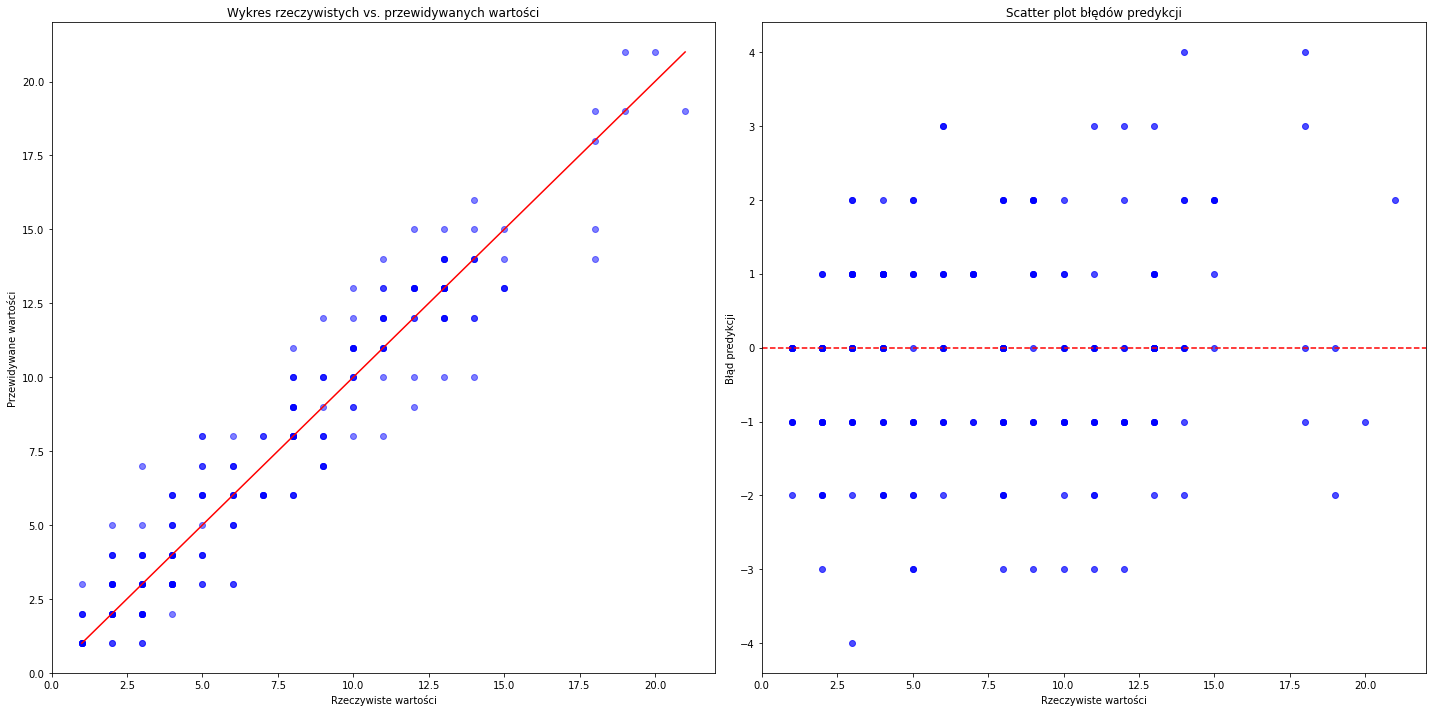

In [1519]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].scatter(y_test, predictions_DT, color='blue', alpha=0.5)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
axes[0].set_title('Wykres rzeczywistych vs. przewidywanych wartości')
axes[0].set_xlabel('Rzeczywiste wartości')
axes[0].set_ylabel('Przewidywane wartości')

errors = y_test - predictions_DT
axes[1].scatter(y_test, errors, color='blue', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Scatter plot błędów predykcji')
axes[1].set_xlabel('Rzeczywiste wartości')
axes[1].set_ylabel('Błąd predykcji')

plt.tight_layout()
plt.show()

<br>

In [1520]:
X_DT = data_matrix[['G', 'TOTMP', 'PPG', 'Height']]

In [1521]:
model_DT2 = DecisionTreeClassifier().fit(X_DT, y)

In [1522]:
predictions_DT2 = model_DT2.predict(test_df[['G', 'TOTMP', 'PPG', 'Height']])

In [1523]:
r2_score(test_df['Yrs'], predictions_DT2)

0.947274031563845

In [1524]:
mean_squared_error(test_df['Yrs'], predictions_DT2)

1.3775510204081634

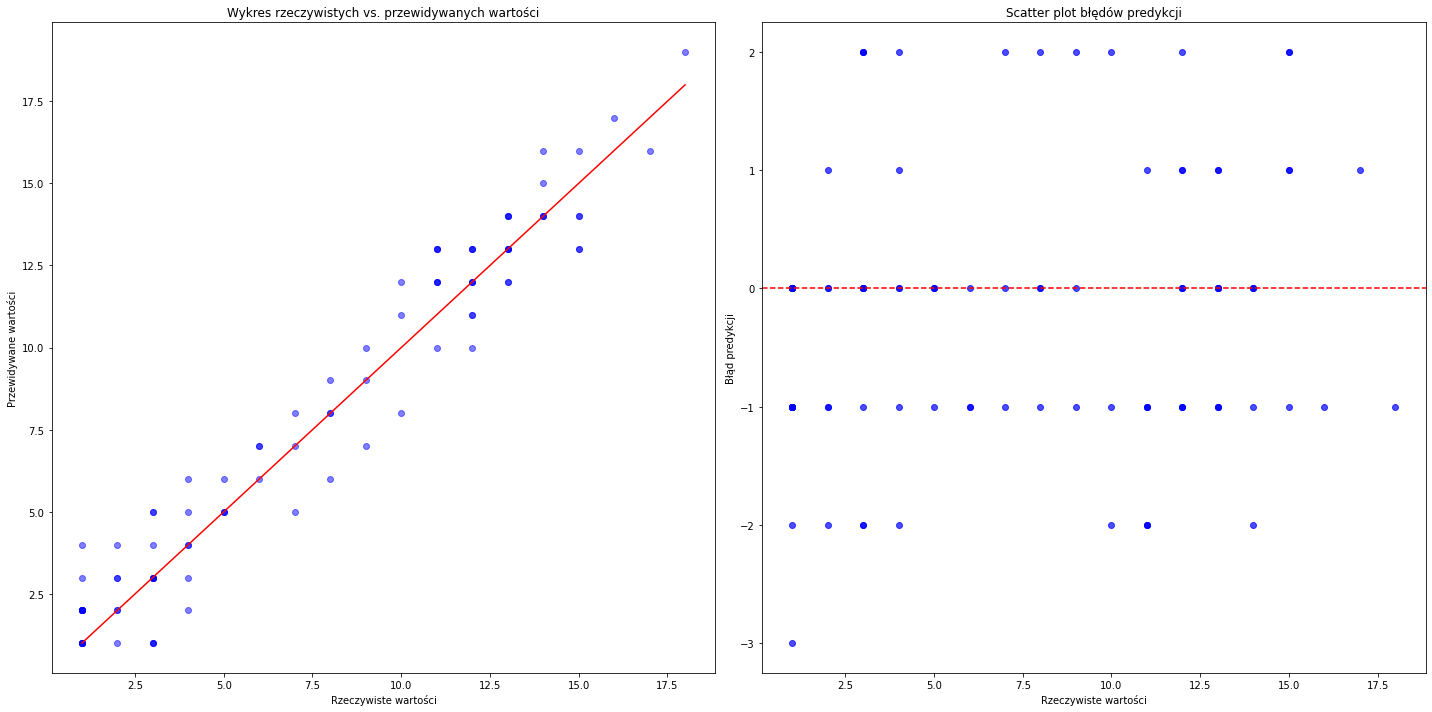

In [1525]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].scatter(test_df['Yrs'], predictions_DT2, color='blue', alpha=0.5)
axes[0].plot([min(test_df['Yrs']), max(test_df['Yrs'])], [min(test_df['Yrs']), max(test_df['Yrs'])], color='red')
axes[0].set_title('Wykres rzeczywistych vs. przewidywanych wartości')
axes[0].set_xlabel('Rzeczywiste wartości')
axes[0].set_ylabel('Przewidywane wartości')

errors = test_df['Yrs'] - predictions_DT2
axes[1].scatter(test_df['Yrs'], errors, color='blue', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Scatter plot błędów predykcji')
axes[1].set_xlabel('Rzeczywiste wartości')
axes[1].set_ylabel('Błąd predykcji')


plt.tight_layout()
plt.show()

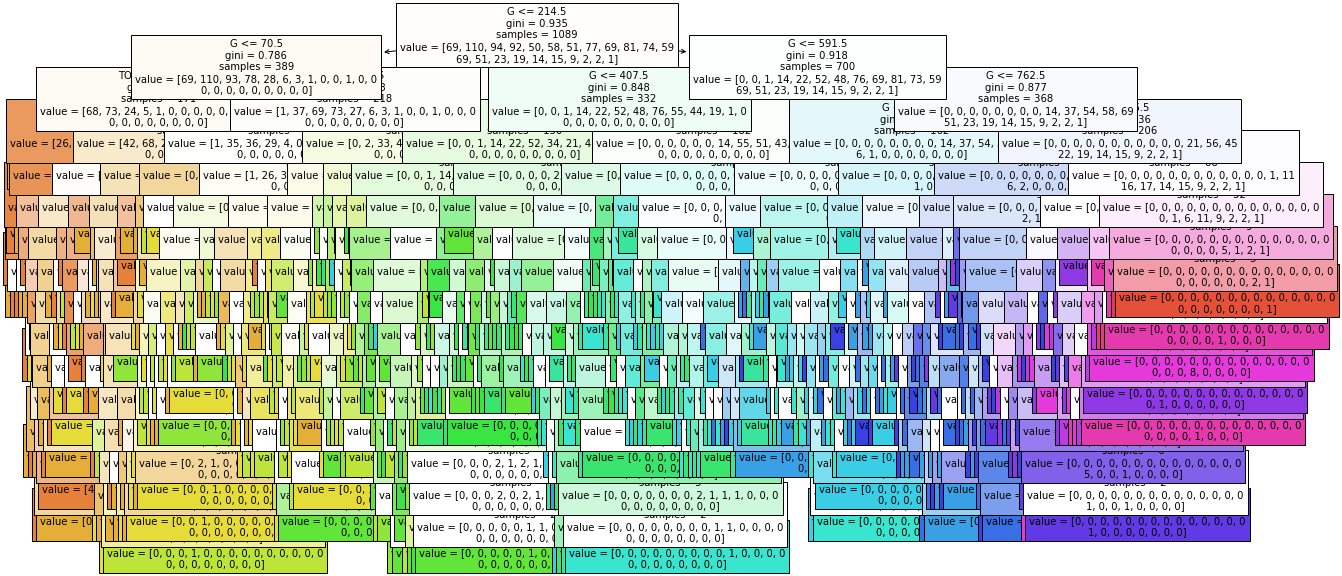

In [1526]:
plt.figure(figsize=(20,10))
plot_tree(model_DT2, feature_names=X_DT.columns, filled=True, fontsize=10)
plt.show()

<br>

## Lasy losowe

In [1527]:
from sklearn.ensemble import RandomForestClassifier

In [1528]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1529]:
model_RF = RandomForestClassifier(n_estimators=300, random_state=42).fit(X_train, y_train)

In [1530]:
predictions_RF = model_RF.predict(X_test)

In [1531]:
r2_score(y_test, predictions_RF)

0.9376638434427859

In [1532]:
mean_squared_error(y_test, predictions_RF)

1.3394495412844036

In [1533]:
accuracy_score(y_test, predictions_RF)

0.3623853211009174

<br>

In [1534]:
n_estimators_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
mse_scores = []

for n_estimators in n_estimators_list:
    model_RF = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model_RF.fit(X_train, y_train)
    predictions_RF = model_RF.predict(X_test)
    mse = mean_squared_error(y_test, predictions_RF)
    mse_scores.append(mse)

In [1535]:
best_index = mse_scores.index(min(mse_scores))
best_n_estimators = n_estimators_list[best_index]

print("Najlepsza liczba estymatorów:", best_n_estimators)

Najlepsza liczba estymatorów: 300


In [1536]:
mse_scores

[1.4311926605504588,
 1.426605504587156,
 1.3394495412844036,
 1.4174311926605505,
 1.3577981651376148,
 1.408256880733945,
 1.4174311926605505,
 1.4036697247706422,
 1.426605504587156,
 1.3669724770642202]

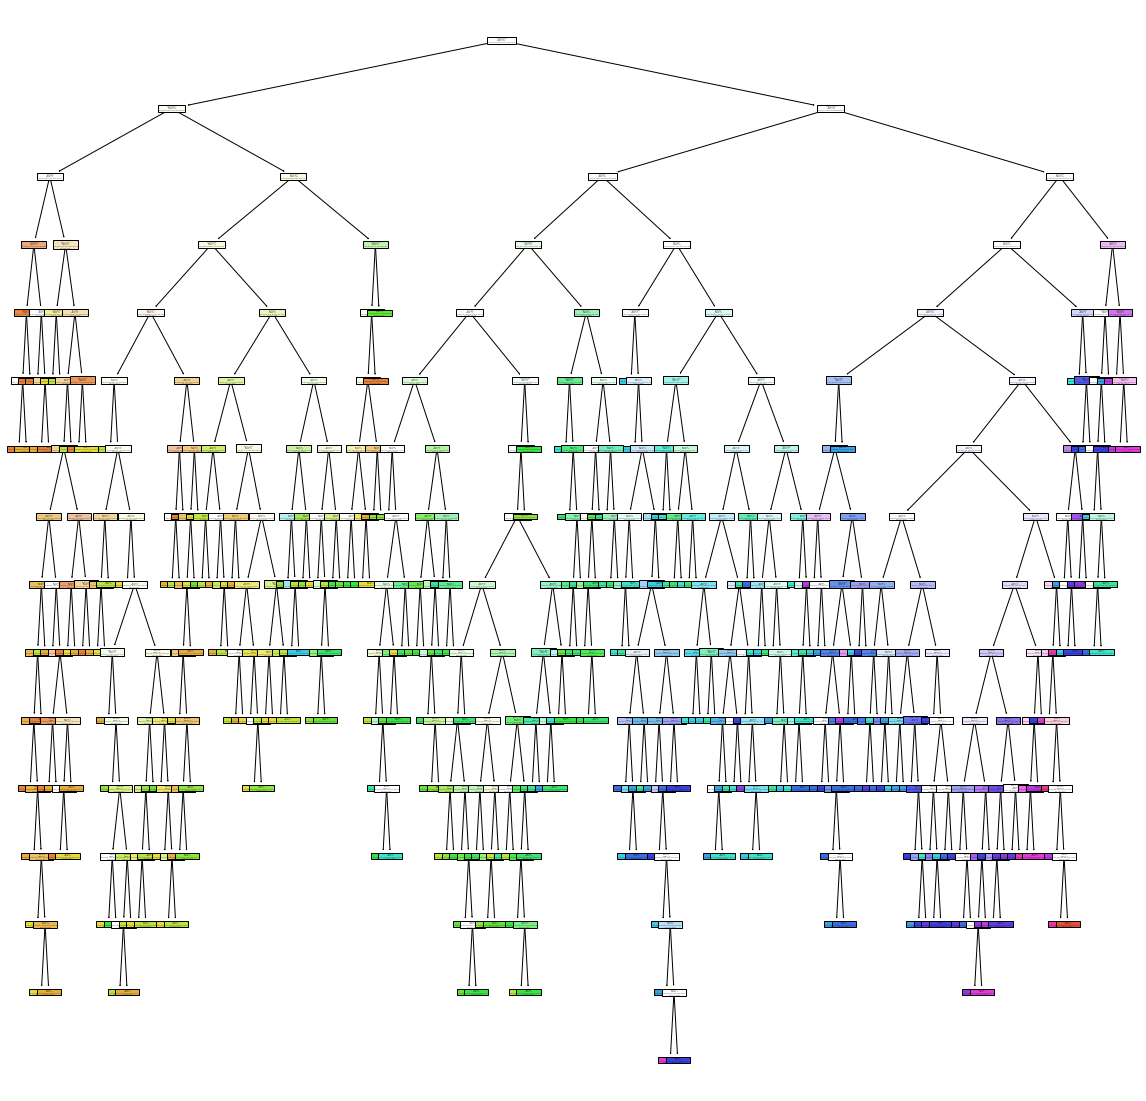

In [1537]:
plt.figure(figsize=(20,20))
tree.plot_tree(model_RF.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

<br>

### Analiza ważności cech

In [1538]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [1539]:
model_RF.feature_importances_

array([0.04562049, 0.1563542 , 0.09107563, 0.06933372, 0.07292744,
       0.05273385, 0.04596367, 0.04298132, 0.04795107, 0.04773226,
       0.0402986 , 0.0450779 , 0.05307986, 0.04670218, 0.03870075,
       0.03706338, 0.02961239, 0.03679132])

In [1570]:
model_RF_reduced = SelectFromModel(model_RF, threshold=0.045).fit(X_train, y_train)
X_selected = model_RF_reduced.transform(X_train)
X_test_selected = model_RF_reduced.transform(X_test)

In [1571]:
X_train.columns[model_RF.feature_importances_ > 0.045]

Index(['Pk', 'G', 'TOTMP', 'TOTPTS', 'TOTTRB', 'TOTAST', 'FG%', 'FT%', 'WS/48',
       'VORP', 'MPG', 'PPG'],
      dtype='object')

In [1596]:
model_RF_reduced = RandomForestRegressor(n_estimators=n_estimators, random_state=42).fit(X_selected, y_train)

In [1597]:
predictions_FR_reduced = model_RF_reduced.predict(X_test_selected)

In [1598]:
mean_squared_error(y_test, predictions_FR_reduced)

1.012830633027523

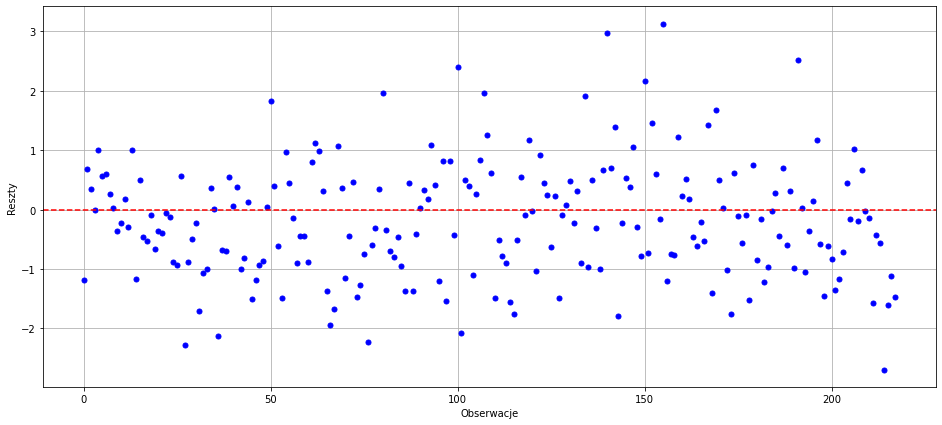

In [1599]:
plt.figure(figsize=(16, 7))
plt.plot(np.arange(len(y_test-predictions_FR_reduced)), y_test-predictions_FR_reduced, marker='o', linestyle='', color='blue', markersize=5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Obserwacje')
plt.ylabel('Reszty')
plt.grid(True)
plt.show()

<br>

## Metoda najbliższych sąsiadów

In [1289]:
from sklearn.neighbors import KNeighborsRegressor

In [1290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1291]:
knn_model = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [1292]:
mean_squared_error(y_train, knn_model.predict(X_train))

1.317132287281541

In [1293]:
predictions_KNN = knn_model.predict(X_test)

In [1294]:
mean_squared_error(y_test, predictions_KNN)

2.9138634046890926

Można zaobserwować stosunkowo dużą różnicę pomiędzy MSE na danych treningowych a MSE na danych testowych. Oznacza to, że model cierpi na nadmierne dopasowanie do danych uczących: nie generalizuje dobrze.

<br>

### Poprawianie wydajności kNN

In [1295]:
from sklearn.model_selection import GridSearchCV

In [1296]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [1297]:
gridsearch.best_params_

{'n_neighbors': 12}

In [1298]:
mean_squared_error(y_train, gridsearch.predict(X_train))

1.9802908534251817

In [1299]:
predictions_KNN_grid = gridsearch.predict(X_test)

In [1300]:
mean_squared_error(y_test, predictions_KNN_grid)

2.2810907237512743

<br>

In [1301]:
from sklearn.ensemble import BaggingRegressor

In [1302]:
bagging_model = BaggingRegressor(KNeighborsRegressor(n_neighbors=12), n_estimators=100).fit(X_train, y_train)

In [1303]:
predictions_KNN_bagging = bagging_model.predict(X_test)

In [1304]:
mean_squared_error(y_train, bagging_model.predict(X_train))

1.9542411691542287

In [1305]:
mean_squared_error(y_test, predictions_KNN_bagging)

2.270822378312946

Text(0.5, 1.0, 'Porównanie wartości MSE dla różnych modeli')

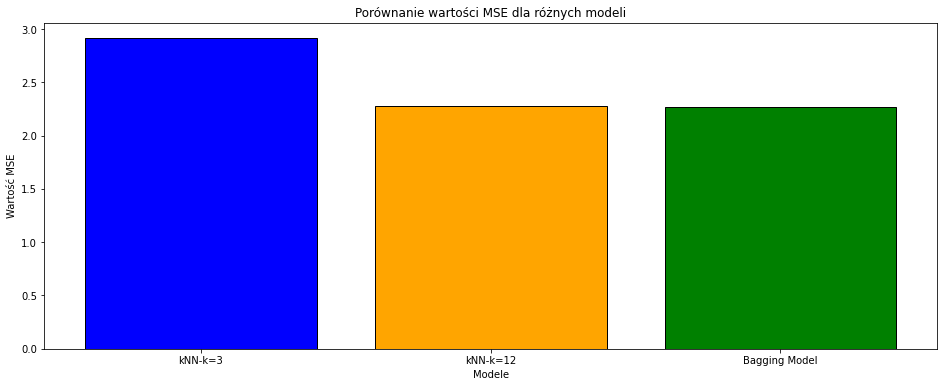

In [1306]:
modele_kNN = ['kNN-k=3', 'kNN-k=12', 'Bagging Model']
mse_kNN = [mean_squared_error(y_test, predictions_KNN),
                mean_squared_error(y_test, predictions_KNN_grid),
                mean_squared_error(y_test, predictions_KNN_bagging)]

plt.figure(figsize=(16, 6))
plt.bar(modele_kNN, mse_kNN, color=['blue', 'orange', 'green'], edgecolor='black')

plt.xlabel('Modele')
plt.ylabel('Wartość MSE')
plt.title('Porównanie wartości MSE dla różnych modeli')

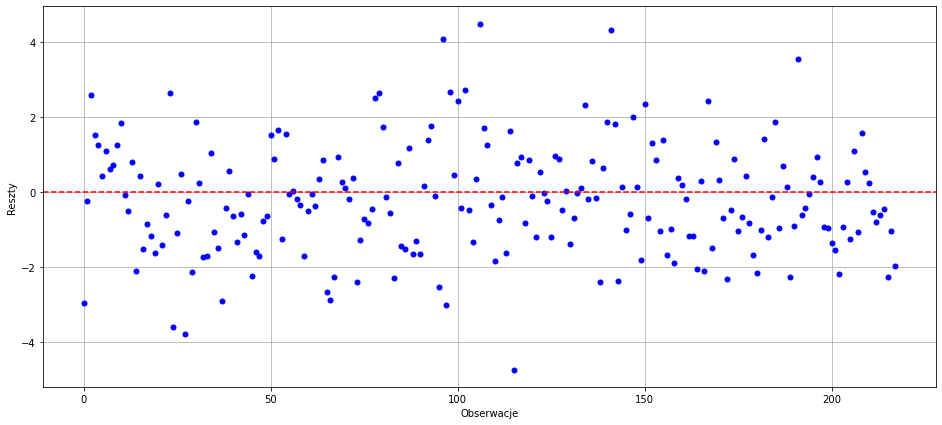

In [1307]:
plt.figure(figsize=(16, 7))
plt.plot(np.arange(len(y_test-predictions_KNN_bagging)), y_test-predictions_KNN_bagging, marker='o', linestyle='', color='blue', markersize=5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Obserwacje')
plt.ylabel('Reszty')
plt.grid(True)
plt.show()

<br>

In [1602]:
bagging_model_reduced = BaggingRegressor(KNeighborsRegressor(n_neighbors=12), n_estimators=100).fit(X_selected, y_train)

In [1603]:
predictions_bagging_model_reduced = bagging_model_reduced.predict(X_test_selected)

In [1604]:
mean_squared_error(y_test, predictions_bagging_model_reduced)

2.2536816864169213